In [ ]:
pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 3.2 MB/s eta 0:00:00


In [ ]:
import openai

import os

import pandas as pd

import time

In [ ]:
gpt_api_key = ''

In [ ]:
import openai
openai.api_key = gpt_api_key

models = dict(openai.Model.list())
print(sorted([ i['id'] for i in models['data'] if i['id'].startswith('gpt') ]))

['gpt-3.5-turbo', 'gpt-3.5-turbo-0125', 'gpt-3.5-turbo-1106', 'gpt-3.5-turbo-16k', 'gpt-3.5-turbo-instruct', 'gpt-3.5-turbo-instruct-0914', 'gpt-4', 'gpt-4-0125-preview', 'gpt-4-0613', 'gpt-4-1106-preview', 'gpt-4-turbo', 'gpt-4-turbo-2024-04-09', 'gpt-4-turbo-preview', 'gpt-4o', 'gpt-4o-2024-05-13', 'gpt-4o-2024-08-06', 'gpt-4o-mini', 'gpt-4o-mini-2024-07-18', 'gpt4o-0806-loco-vm']


**Zero-shot - Danish**

In [ ]:
pet = "gået bort"
text = "for ærlig dertil , så blev hun ikke sat , som måske havde været det bedste “ , tilføjede hun naivt ; „ thi	så var min salig mand måske ikke <PET>gået</PET> bort med	hende i rum sø året derefter , og Brødegård fik alligevel sin assurance , for den onde hjælper altid"

In [ ]:
import openai

def is_euphemism(pet, text, openai_api_key):

    prompt = f"Is the phrase '{pet}' a euphemism in the following Danish text: \"{text}\"?\n\nAnswer with 'Yes' or 'No' and explain why."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key

    result = is_euphemism(pet, text, openai_api_key)
    print(result)


Yes, the phrase 'gået bort' is a euphemism in the given Danish text. In Danish, 'gået bort' literally translates to 'gone away' or 'passed away' in English, and it is commonly used as a euphemism for someone who has died. In the context of the text, it suggests that the speaker's husband has died, using a softer expression instead of directly stating that he died.


In [ ]:
# prompt: read 3 sheets in excel file to a single dataframe

import pandas as pd

# Specify the path to your Excel file
excel_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx'

# Read the sheets into separate DataFrames
df1 = pd.read_excel(excel_file, sheet_name='Training Set (Alex)')
df2 = pd.read_excel(excel_file, sheet_name='Training Set (Bolette)')
df3 = pd.read_excel(excel_file, sheet_name='Training Set (Jens)')

# Concatenate the DataFrames
training_df = pd.concat([df1, df2, df3], ignore_index=True)

# Now combined_df contains data from all three sheets
print(training_df)


                                       Sentence_before  \
0    Hun bedrager migi — gispede han mellem de samm...   
1    Og endda hun havde gået og glæd sig til at for...   
2    klosterbo . Hvad vil du da ? Vil du sidde her ...   
3    „ Kære , gamle ven ! „ Med dyb bekjymring må j...   
4    „ hendes sidste levedage ; jeg formoder hun vi...   
..                                                 ...   
669  munden , således som han ofte havde været at s...   
670  blev bestyret af Karen , en ældre pige , der h...   
671  åndfuld . . . så . . . « Fruen havde dyb ringe...   
672  forældrene istemme : nu lader os da grave ned ...   
673  Hans excellence veg ikke fra det leje , nonner...   

                                              Sentence  \
0    er opvokset i sådanne omgivelser ? For en smer...   
1    git hende mod til at komme hjem , for ellers h...   
2      Når din moder er vandret heden , og denne smule   
3    „ min eneste søn er afgået ved døden , efter e...   
4          „ 

In [ ]:
#danish text preproccessing
import re
import nltk
import string

nltk.download('punkt')
nltk.download("stopwords")

def preprocess_danish(text):
    # Lowercase the text
    text = text.lower()
    # Remove punctuation
    text = text.translate(text.maketrans("", "", string.punctuation))
    text = re.sub(r'[^a-zA-ZæøåÆØÅ]', ' ', text)
    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Remove stopwords (optional)
    #nltk.download('stopwords')
    from nltk.corpus import stopwords
    #stop_words = set(stopwords.words("danish"))
    #tokens = [word for word in tokens if word not in stop_words]

    return (" ".join(tokens))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
training_df = training_df.rename(columns={'Is Death Euphemism? (Yes/No)':'label'})
training_df['text'] = training_df['Sentence_before'] + ' ' + training_df['Sentence'] + ' ' + training_df['Sentence_after']
# combined_df['text'] = combined_df['text'].apply(preprocess_danish)
training_df.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key,label,text
0,Hun bedrager migi — gispede han mellem de samm...,er opvokset i sådanne omgivelser ? For en smer...,"simpelthen sige hende , at jeg ved og forstår ...",1893_Schoeyen_EtLoefte.txt,1893,kommer hjem,kom* hjem,No,Hun bedrager migi — gispede han mellem de samm...
1,Og endda hun havde gået og glæd sig til at for...,"git hende mod til at komme hjem , for ellers h...","hun da aldrig vovet at vise sig for ham mere ,...",1888_SkramA_Lucie.txt,1888,komme hjem,kom* hjem,No,Og endda hun havde gået og glæd sig til at for...
2,klosterbo . Hvad vil du da ? Vil du sidde her ...,"Når din moder er vandret heden , og denne smule","jord , som endda kun til hælvten er din moders...",1896_EwaldHF_LidenKirsten.txt,1896,vandret heden,vandr* heden,Yes,klosterbo . Hvad vil du da ? Vil du sidde her ...
3,"„ Kære , gamle ven ! „ Med dyb bekjymring må j...","„ min eneste søn er afgået ved døden , efter e...",„ smertefuldt sygeleje . Jeg var hos ham i han...,1872_LeFevre_DianaEllerHaabloesKjaerlighed.txt,1872,afgået ved døden,afg* ved døden,Yes,"„ Kære , gamle ven ! „ Med dyb bekjymring må j..."
4,„ hendes sidste levedage ; jeg formoder hun vi...,"„ vandrer heden . Bed ham komme herhen , så",„ hurtigt som muligt . “ Det var efter modtage...,1870_GB_PolitispionenEllerHaelerhusetPaaKristi...,1870,vandrer heden,vandr* heden,Yes,„ hendes sidste levedage ; jeg formoder hun vi...


In [ ]:
# prompt: add text and label to key value of a dictionary

data = []
for index, row in training_df.iterrows():
  data.append({
      "text": row["text"],
      "match": row["Match"]
  })
len(data)

674

In [ ]:
# prompt: How to find match given text from data

def find_match(text, data):
  """
  Finds the match for a given text in the data.

  Args:
    text: The text to search for.
    data: A list of dictionaries containing text and match information.

  Returns:
    The match value if found, otherwise None.
  """
  for item in data:
    if item["text"] == text:
      return item["match"]
  return None

# Example usage
text_to_search = "this is an example text"
match = find_match(text_to_search, data)

if match:
  print(f"Match found: {match}")
else:
  print("No match found.")


No match found.


In [ ]:
# prompt: read csv file

import pandas as pd

# Specify the path to your CSV file
csv_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Data/eval_subset.csv'

# Read the CSV file into a pandas DataFrame
df_valid = pd.read_csv(csv_file)

# Now you can work with the DataFrame 'df'
print(df_valid.head())  # Display the first few rows


                                                text  label
0  noget til denne ulykke . En mørk , uhyggelig s...      1
1  væggenes malning og det noget massive , men sm...      1
2  kastede , hvor underligt det end lyder , en mø...      1
3  „ Ja , det er også sket for min ven Eugene Sue...      1
4  „ Alle dages ende er endnu ikke kommen , unge ...      1


In [ ]:
# prompt: replace the [PET_BOUNDARY] with empty in all text at df['text']

df_valid['text'] = df_valid['text'].str.replace('[PET_BOUNDARY]', '')


In [ ]:
for text in df_valid['text'].tolist():
  print(text)
  print()

noget til denne ulykke . En mørk , uhyggelig stemning greb ham ; han ville ende sit liv , som nu synes ham dobbelt ulykkeligt , da han ikke kunne befri sig for den tanke , at han var årsag til den ville piges død .

væggenes malning og det noget massive , men smukke bohave tydede på , at det oprindelig havde tilhørt en længst hensovet slægt . Der var noget så holdfast ved disse ting , — det gamle ærværdige taffelur på det store udskårne skab med dets „ anno 1620 “ , den højryggede

kastede , hvor underligt det end lyder , en mørk skygge ind i Arnolds liv . Hun ville se ham lykkelig gift , før hun lukkede sine øjne ; — men han elskede en anden kvinde end den , hun havde udset til hans brud . Dette gjorde , at han ikke kunne betro moderen sit

„ Ja , det er også sket for min ven Eugene Sue . Han kunne ikke husfe , hvem man havde ladet himle i de første dele og man så derfor oftere flere salig hensovede sjæle stå op igen i de sidste dele og

„ Alle dages ende er endnu ikke kommen , unge h

In [ ]:
data = []
for index, row in training_df.iterrows():
  data.append({
      "text": row["text"],
      "match": row["Match"]
  })
len(data)

674

In [ ]:
all_text = df_valid['text'].tolist()
match_ = []
new_text = []
for text in all_text:
  m = find_match(text, data)
  match_.append(m)
  new_text.append(text.replace(m, f"<PET>{m}</PET>"))

df_valid['new_text'] = new_text
df_valid['match'] = match_
df_valid.head()

,text,label,new_text,match
0,"noget til denne ulykke . En mørk , uhyggelig s...",1,"noget til denne ulykke . En mørk , uhyggelig s...",ende sit liv
1,"væggenes malning og det noget massive , men sm...",1,"væggenes malning og det noget massive , men sm...",hensovet
2,"kastede , hvor underligt det end lyder , en mø...",1,"kastede , hvor underligt det end lyder , en mø...",lukkede sine øjne
3,"„ Ja , det er også sket for min ven Eugene Sue...",1,"„ Ja , det er også sket for min ven Eugene Sue...",himle
4,"„ Alle dages ende er endnu ikke kommen , unge ...",1,"„ Alle dages ende er endnu ikke kommen , unge ...",omkomme


In [ ]:
all_text = df_valid['new_text'].tolist()[:10]
for text in all_text:
  print(text)
  print()


noget til denne ulykke . En mørk , uhyggelig stemning greb ham ; han ville <PET>ende sit liv</PET> , som nu synes ham dobbelt ulykkeligt , da han ikke kunne befri sig for den tanke , at han var årsag til den ville piges død .

væggenes malning og det noget massive , men smukke bohave tydede på , at det oprindelig havde tilhørt en længst <PET>hensovet</PET> slægt . Der var noget så holdfast ved disse ting , — det gamle ærværdige taffelur på det store udskårne skab med dets „ anno 1620 “ , den højryggede

kastede , hvor underligt det end lyder , en mørk skygge ind i Arnolds liv . Hun ville se ham lykkelig gift , før hun <PET>lukkede sine øjne</PET> ; — men han elskede en anden kvinde end den , hun havde udset til hans brud . Dette gjorde , at han ikke kunne betro moderen sit

„ Ja , det er også sket for min ven Eugene Sue . Han kunne ikke husfe , hvem man havde ladet <PET>himle</PET> i de første dele og man så derfor oftere flere salig hensovede sjæle stå op igen i de sidste dele og

„ A

In [ ]:
#Zero-shot validation
import openai

def is_euphemism(pet, text, openai_api_key):

    prompt = f"Is the phrase '{pet}' a euphemism in the following Danish text: \"{text}\"?\n\nAnswer with 'Yes' or 'No' only."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_valid['label'].tolist()
new_labels = []
texts = df_valid['text'].tolist()
pets = df_valid['match'].tolist()
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key

    for pet,text in zip(texts,pets):
      result = is_euphemism(pet, text, openai_api_key)
      result = result.replace(".",'')
      if result =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)


Yes
Yes
Yes
No
No
Yes
No
Yes


KeyboardInterrupt: 

In [ ]:


import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.7704918032786885}


In [ ]:
#zero-shot with context - validation
import openai

def is_euphemism(pet, text, openai_api_key):
    # Prepare the prompt with the additional context
    context = (
        "A euphemism is a mild or indirect word or expression substituted for one considered to be too harsh, "
        "blunt, or offensive. Euphemisms are used to avoid directly mentioning unpleasant or taboo topics, "
        "and they are often employed to soften the impact of the information being conveyed.\n\n"
    )
    prompt = f"{context}Is the phrase '{pet}' a euphemism in the following Danish text: \"{text}\"?\n\nAnswer with 'Yes' or 'No'only."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_valid['label'].tolist()
new_labels = []
texts = df_valid['new_text'].tolist()
pets = df_valid['match'].tolist()
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key

    for pet,text in zip(texts,pets):
      result = is_euphemism(pet, text, openai_api_key)
      result = result.replace(".",'')
      if result =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)



Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
No
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
No
Yes
No
No
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No


In [ ]:


import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.6177371792332924}


**Testing Set**

In [ ]:
# load the testing set

import pandas as pd

# Specify the path to your Excel file
excel_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx'

# Read the sheets into separate DataFrames
df_test = pd.read_excel(excel_file, sheet_name='Testing Set(All)')

def replace_phrase(row):
  sentence = row['Sentence']
  match = row['Match']
  sentence = sentence.replace(match, "[PET_BOUNDARY]" + match + "[PET_BOUNDARY]")
  return sentence

df_test['Sentence'] = df_test.apply(replace_phrase, axis=1)

df_test['text'] = df_test['Sentence_before'] + ' ' + df_test['Sentence'] + ' ' + df_test['Sentence_after']

# df_test['text'] = df_test['text'].apply(preprocess_danish)

# df_test['text'] = df_test['text'].str.strip()


df_test.head()

,Sentence_before,Sentence,Sentence_after,Match,Phrase Key,Is Death Euphemism? (Alex),Is Death Euphemism? (Bolette),Is Death Euphemism? (Jens),Majority Class,MeMo-BERT-03 Class,NB-BERT,Dansk BERT,DFM,text
0,"længsel efter at høre guds ord , skønt hans fa...","forstå , at en ung student , som [PET_BOUNDARY...","kort påskeferie , straks skulle rende i kirke ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No,"længsel efter at høre guds ord , skønt hans fa..."
1,det . Hun ville følge sit kald og være trofast...,"sige ; nej hun måtte vente , til hun [PET_BOUN...","til moderen , å hvor hun længtede efter hende ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No,det . Hun ville følge sit kald og være trofast...
2,« hvorfor har de ikke sagt mig det straks ? » ...,[PET_BOUNDARY]kom hjem[PET_BOUNDARY] med at me...,"at han var bange for , at teglmesteren skulle ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No,« hvorfor har de ikke sagt mig det straks ? » ...
3,"ham i fingrene , og han syntes formeligt , at ...",— da Abraham [PET_BOUNDARY]kom hjem[PET_BOUNDA...,sin far forynget og ivrig i en stor rørelse af...,kom hjem,kom* hjem,No,No,No,No,No,No,No,No,"ham i fingrene , og han syntes formeligt , at ..."
4,"hytte , et slot , et himmerige , hvor hun skul...",Da han varm og åndepusten [PET_BOUNDARY]kom hj...,alle gået . Moderen trådte ham i møde . „ Nu e...,kom hjem,kom* hjem,No,No,No,No,No,No,No,No,"hytte , et slot , et himmerige , hvor hun skul..."


In [ ]:
# Create a dictionary to map the values
df_test = df_test.rename(columns={'Majority Class':'label'})

value_map = {
    'No': '0',
    'Yes': '1',
}

# Apply the mapping to the column
df_test['label'] = df_test['label'].map(value_map)

In [ ]:
df_test['text'] = df_test['text'].str.replace('[PET_BOUNDARY]', '')

In [ ]:
for text in df_test['text'].tolist():
  print(text)
  print()

længsel efter at høre guds ord , skønt hans fader , som aldrig gik i kirke , slet ikke kunne forstå , at en ung student , som kom hjem i en kort påskeferie , straks skulle rende i kirke , som han udtrykte sig — så skulle han i det

det . Hun ville følge sit kald og være trofast mod det : men til faderen kunne hun intet sige ; nej hun måtte vente , til hun kom hjem til moderen , å hvor hun længtede efter hende , hun ville forstå hende . Hun smilede , hun

« hvorfor har de ikke sagt mig det straks ? » « hvorfor ? « jeg ville vente til min mand kom hjem med at meddele ham det . Jeg vidste , at han var bange for , at teglmesteren skulle løbe fra det hele , medens han var borte . Jeg husker ,

ham i fingrene , og han syntes formeligt , at det krøllede papir lugtede godt . — — da Abraham kom hjem , fandt han altså sin far forynget og ivrig i en stor rørelse af . forskellige foretagender , skønt Fortuna

hytte , et slot , et himmerige , hvor hun skulle sidde ved hans højre hånd og dømme . . .

In [ ]:
df_test.head()

,Sentence_before,Sentence,Sentence_after,Match,Phrase Key,Is Death Euphemism? (Alex),Is Death Euphemism? (Bolette),Is Death Euphemism? (Jens),label,MeMo-BERT-03 Class,NB-BERT,Dansk BERT,DFM,text
0,"længsel efter at høre guds ord , skønt hans fa...","forstå , at en ung student , som [PET_BOUNDARY...","kort påskeferie , straks skulle rende i kirke ...",kom hjem,kom* hjem,No,No,No,0,No,No,No,No,"længsel efter at høre guds ord , skønt hans fa..."
1,det . Hun ville følge sit kald og være trofast...,"sige ; nej hun måtte vente , til hun [PET_BOUN...","til moderen , å hvor hun længtede efter hende ...",kom hjem,kom* hjem,No,No,No,0,No,No,No,No,det . Hun ville følge sit kald og være trofast...
2,« hvorfor har de ikke sagt mig det straks ? » ...,[PET_BOUNDARY]kom hjem[PET_BOUNDARY] med at me...,"at han var bange for , at teglmesteren skulle ...",kom hjem,kom* hjem,No,No,No,0,No,No,No,No,« hvorfor har de ikke sagt mig det straks ? » ...
3,"ham i fingrene , og han syntes formeligt , at ...",— da Abraham [PET_BOUNDARY]kom hjem[PET_BOUNDA...,sin far forynget og ivrig i en stor rørelse af...,kom hjem,kom* hjem,No,No,No,0,No,No,No,No,"ham i fingrene , og han syntes formeligt , at ..."
4,"hytte , et slot , et himmerige , hvor hun skul...",Da han varm og åndepusten [PET_BOUNDARY]kom hj...,alle gået . Moderen trådte ham i møde . „ Nu e...,kom hjem,kom* hjem,No,No,No,0,No,No,No,No,"hytte , et slot , et himmerige , hvor hun skul..."


In [ ]:
data = []
for index, row in df_test.iterrows():
  data.append({
      "text": row["text"],
      "match": row["Match"]
  })
len(data)

125

In [ ]:
all_text = df_test['text'].tolist()
match_ = []
new_text = []
for text in all_text:
  m = find_match(text, data)
  match_.append(m)
  new_text.append(text.replace(m, f"<PET>{m}</PET>"))

df_test['new_text'] = new_text
df_test['match'] = match_
df_test.head()

,Sentence_before,Sentence,Sentence_after,Match,Phrase Key,Is Death Euphemism? (Alex),Is Death Euphemism? (Bolette),Is Death Euphemism? (Jens),label,MeMo-BERT-03 Class,NB-BERT,Dansk BERT,DFM,text,new_text,match
0,"længsel efter at høre guds ord , skønt hans fa...","forstå , at en ung student , som [PET_BOUNDARY...","kort påskeferie , straks skulle rende i kirke ...",kom hjem,kom* hjem,No,No,No,0,No,No,No,No,"længsel efter at høre guds ord , skønt hans fa...","længsel efter at høre guds ord , skønt hans fa...",kom hjem
1,det . Hun ville følge sit kald og være trofast...,"sige ; nej hun måtte vente , til hun [PET_BOUN...","til moderen , å hvor hun længtede efter hende ...",kom hjem,kom* hjem,No,No,No,0,No,No,No,No,det . Hun ville følge sit kald og være trofast...,det . Hun ville følge sit kald og være trofast...,kom hjem
2,« hvorfor har de ikke sagt mig det straks ? » ...,[PET_BOUNDARY]kom hjem[PET_BOUNDARY] med at me...,"at han var bange for , at teglmesteren skulle ...",kom hjem,kom* hjem,No,No,No,0,No,No,No,No,« hvorfor har de ikke sagt mig det straks ? » ...,« hvorfor har de ikke sagt mig det straks ? » ...,kom hjem
3,"ham i fingrene , og han syntes formeligt , at ...",— da Abraham [PET_BOUNDARY]kom hjem[PET_BOUNDA...,sin far forynget og ivrig i en stor rørelse af...,kom hjem,kom* hjem,No,No,No,0,No,No,No,No,"ham i fingrene , og han syntes formeligt , at ...","ham i fingrene , og han syntes formeligt , at ...",kom hjem
4,"hytte , et slot , et himmerige , hvor hun skul...",Da han varm og åndepusten [PET_BOUNDARY]kom hj...,alle gået . Moderen trådte ham i møde . „ Nu e...,kom hjem,kom* hjem,No,No,No,0,No,No,No,No,"hytte , et slot , et himmerige , hvor hun skul...","hytte , et slot , et himmerige , hvor hun skul...",kom hjem


In [ ]:
all_text = df_test['new_text'].tolist()[:10]
for text in all_text:
  print(text)
  print()


længsel efter at høre guds ord , skønt hans fader , som aldrig gik i kirke , slet ikke kunne forstå , at en ung student , som <PET>kom hjem</PET> i en kort påskeferie , straks skulle rende i kirke , som han udtrykte sig — så skulle han i det

det . Hun ville følge sit kald og være trofast mod det : men til faderen kunne hun intet sige ; nej hun måtte vente , til hun <PET>kom hjem</PET> til moderen , å hvor hun længtede efter hende , hun ville forstå hende . Hun smilede , hun

« hvorfor har de ikke sagt mig det straks ? » « hvorfor ? « jeg ville vente til min mand <PET>kom hjem</PET> med at meddele ham det . Jeg vidste , at han var bange for , at teglmesteren skulle løbe fra det hele , medens han var borte . Jeg husker ,

ham i fingrene , og han syntes formeligt , at det krøllede papir lugtede godt . — — da Abraham <PET>kom hjem</PET> , fandt han altså sin far forynget og ivrig i en stor rørelse af . forskellige foretagender , skønt Fortuna

hytte , et slot , et himmerige , hvor hun sku

In [ ]:
#zero-shot - testing

import openai

def is_euphemism(pet, text, openai_api_key):

    prompt = f"Is the phrase '{pet}' a euphemism in the following Danish text: \"{text}\"?\n\nAnswer with 'Yes' or 'No' only"

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_test['label'].tolist()
new_labels = []
texts = df_test['text'].tolist()
pets = df_test['match'].tolist()
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key

    for pet,text in zip(texts,pets):
      result = is_euphemism(pet, text, openai_api_key)
      if result.replace(".","") =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)


No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
No
No
No
No
No
Yes
No
No
Yes
Yes
No
Yes
Yes
No
No
No
No
Yes
No
Yes
Yes
Yes
No
No
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes.
Yes
Yes
Yes
No
No
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes.
No
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


In [ ]:
# prompt: change the list type to int

# Convert the labels to integers
old_labels = [int(x) for x in old_labels]
new_labels = [int(x) for x in new_labels]


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.7172649572649573}


In [ ]:
#zero-shot with context - testing
import openai

def is_euphemism(pet, text, openai_api_key):
    # Prepare the prompt with the additional context
    context = (
        "A euphemism is a mild or indirect word or expression substituted for one considered to be too harsh, "
        "blunt, or offensive. Euphemisms are used to avoid directly mentioning unpleasant or taboo topics, "
        "and they are often employed to soften the impact of the information being conveyed.\n\n"
    )
    prompt = f"{context}Is the phrase '{pet}' a euphemism in the following Danish text: \"{text}\"?\n\nAnswer with 'Yes' or 'No'only."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=100,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_test['label'].tolist()
new_labels = []
texts = df_test['new_text'].tolist()
pets = df_test['match'].tolist()
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key

    for pet,text in zip(texts,pets):
      result = is_euphemism(pet, text, openai_api_key)
      result = result.replace(".",'')
      if result =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)



No
No
No
No
No
Yes
No
No
No
No
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
No
No
No
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


In [ ]:
# prompt: change the list type to int

# Convert the labels to integers
old_labels = [int(x) for x in old_labels]
new_labels = [int(x) for x in new_labels]


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.6135112189205579}


**Few-shot - Danish**

In [ ]:
# prompt: I want samples of df['new_text'] and df['label'] and df['match'] as follow:
# examples = (
# "Euphemism examples:\n"
# "Example - Is the phrase 'passed away' a Euphemism in the following text. He passed away peacefully in his sleep. — Answer - 'True'\n"
# "Literal examples:\n"
# "Example - Is the phrase 'jobless' a Euphemism in the following text. He has been jobless for a few months now. — Answer - 'False)

# Select a few samples from the DataFrame
samples = training_df[['text', 'label', 'Match']].sample(n=2)

# Create the examples string
examples = "Euphemism examples:\n"
for index, row in samples[samples['label'] == 'Yes'].iterrows():
    examples += f"Example - Is the phrase '{row['Match']}' a Euphemism in the following text: {row['text']} — Answer - 'Yes'\n"

examples += "\nLiteral examples:\n"
for index, row in samples[samples['label'] == 'No'].iterrows():
    examples += f"Example - Is the phrase '{row['Match']}' a Euphemism in the following text: {row['text']} — Answer - 'No'\n"

print(examples)


Euphemism examples:
Example - Is the phrase 'udåndede' a Euphemism in the following text: kere . Men heller ikke den kunne modstå vægten af det pres , der blev udvist imod den . Den bukkede snart sammen under byrden og udåndede med et sagte , overanstrengt suk . — først da optrådte rosinante på skuepladsen . Det solide og — Answer - 'Yes'

Literal examples:
Example - Is the phrase 'får fred' a Euphemism in the following text: den skal hun få . Mulig kan den dog udrette så meget , at hun skikker sig en tid , så at du får fred , mens jeg er borte . Jeg lovede hende en skriftefader til at tage hende i skole , og ham skal hun nu få . « — Answer - 'No'



In [ ]:
training_df.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key,label,text
0,Hun bedrager migi — gispede han mellem de samm...,er opvokset i sådanne omgivelser ? For en smer...,"simpelthen sige hende , at jeg ved og forstår ...",1893_Schoeyen_EtLoefte.txt,1893,kommer hjem,kom* hjem,No,Hun bedrager migi — gispede han mellem de samm...
1,Og endda hun havde gået og glæd sig til at for...,"git hende mod til at komme hjem , for ellers h...","hun da aldrig vovet at vise sig for ham mere ,...",1888_SkramA_Lucie.txt,1888,komme hjem,kom* hjem,No,Og endda hun havde gået og glæd sig til at for...
2,klosterbo . Hvad vil du da ? Vil du sidde her ...,"Når din moder er vandret heden , og denne smule","jord , som endda kun til hælvten er din moders...",1896_EwaldHF_LidenKirsten.txt,1896,vandret heden,vandr* heden,Yes,klosterbo . Hvad vil du da ? Vil du sidde her ...
3,"„ Kære , gamle ven ! „ Med dyb bekjymring må j...","„ min eneste søn er afgået ved døden , efter e...",„ smertefuldt sygeleje . Jeg var hos ham i han...,1872_LeFevre_DianaEllerHaabloesKjaerlighed.txt,1872,afgået ved døden,afg* ved døden,Yes,"„ Kære , gamle ven ! „ Med dyb bekjymring må j..."
4,„ hendes sidste levedage ; jeg formoder hun vi...,"„ vandrer heden . Bed ham komme herhen , så",„ hurtigt som muligt . “ Det var efter modtage...,1870_GB_PolitispionenEllerHaelerhusetPaaKristi...,1870,vandrer heden,vandr* heden,Yes,„ hendes sidste levedage ; jeg formoder hun vi...


In [ ]:
#few-shot - validation
import openai

def is_euphemism(pet, text, openai_api_key):
    # Prepare the examples
#     examples = (

#         "Euphemism examples:\n"
# "Example - Is the phrase 'går i graven' a Euphemism in the following text: tårer bort jeg ville gå i graven dersom en ulykke skete vender de ikke mere trlbage da ved jeg at jeg <PET>går i graven</PET> og min søn den stakkels dreng hvorledes vil han optage budskabet om ingas forsvinden nej mit hoved smerter — Answer - 'True'\n"
# "Example - Is the phrase 'vandrede heden' a Euphemism in the following text: aldrig rigtig vidst hvoraf det egentlig er opstået således er det blevet afgjort og de fik parret i fælden og nu skal de også blive hos hinanden for bestandig afbrød bonden hende men en betingelse stiller jeg jeg overlader dig ejendommen ditlev men ikke bygningen her det gamle warttårn der bliver din moder og jeg boende du flytter ind på den gård jeg har ladet bygge ovre på solbakken nu ved du hvorfor der er mere sollyst og luftigt for sådan et par unge fugle til at bygge rede når vi to gamle en gang er <PET>vandrede heden</PET> kan du jo endda gøre som du lyster du kan drage her over eller lade de gamle mure forfalde nu kan du måste også forstå hvorfor jeg har hastet så stærkt med arbejdet resten skal du selv besørge om otte dage kan du være færdig og så holder vi høstgilde og bryllup på en gang nu er vel alt i orden håber jeg sluttede — Answer - 'True'\n"
# "Example - Is the phrase 'revet bort' a Euphemism in the following text: at vende mine øjne bort fra liget thi jeg turde virkelig ikke se på det det forekom mig at den krafffuldt byggede mand som jeg havde <PET>revet bort</PET> fra denne jord medens han endnu stod i livets vår hele tiden holdt sine uhyggeligt stirrende — Answer - 'True'\n"
# "Example - Is the phrase 'afgået ved døden' a Euphemism in the following text: dag et brev med sort segl det kom fra brasilien og underrettede hende om at hendes broder var <PET>afgået ved døden</PET> var det en sorgens efterretning for hende man skulle tro det thi nu måtte understøttelsen — Answer - 'True'\n"
# "Example - Is the phrase 'hensovet' a Euphemism in the following text: for en halv time siden havde bløderen taget en kærlig afsked med ham og var derefter blidt <PET>hensovet</PET> længe sad baronen og betragtede det clsfede åsyn hvori der nu fandtes udtryk af en illa og — Answer - 'True'\n"

# "Literal examples:\n"
# "Example - Is the phrase 'omkomme' a Euphemism in the following text: agnes kom og bragte åringers fred hendes skønhed var mild og blid og sval som luften i klare forårsnætter og det var som skinnede månen over den hun elskede men det blev til sidst for niels som måtte hans øjne dø i denne evige bleghed og hans sjæl <PET>omkomme</PET> af farvenød hans ville hjerte begærede at en morgenrøde måtte gry blandt brændende skyer og en sol stå op i floder af blod og guld og derfor satte hans sjæl sig atter på barneskammelen ved hjemmets yderste væg og lyttede i lange aftener efter larmen fra de store gader i livets stad derfor står han nu i denne skumringstime og ser ud og ønsker at følge hvert menneske der går forbi ønsker at vandre deres veje kende deres verdner smage deres glæder dele deres vin men foran ham ligger kun den lange kedsomme aften — Answer - 'False'\n"
# "Example - Is the phrase 'få fred' a Euphemism in the following text: sagte nej men jeg skal se ham og de skal se ham og vi skulle begge <PET>få fred</PET> i evigheders evighed ja de ogsål thi jeg kender dem godt deres fader har talt til mig om — Answer - 'False'\n"
# "Example - Is the phrase 'himle' a Euphemism in the following text: om aftenen på en beværtning der forestodes af en tidligere politireporter her udskældte de alt og alle drak og hævede hinanden over alle <PET>himle</PET> indtil det behagede dem at stige ned igen og samles i en vari t e — Answer - 'False'\n"
# "Example - Is the phrase 'kom frem' a Euphemism in the following text: bordet hånden var som vandsøgerens pilekvist den bøjede sig snart mod det rette sted og nummeret for i dag <PET>kom frem</PET> han foldede avisen ud og kiggede feuilletonen igennem — Answer - 'False'\n"
# "Example - Is the phrase 'revet bort' a Euphemism in the following text: ude på kirkegulvet måtte han tvinge sig for ikke at komme til at græde de lød ham som en afsked de ord han så sig <PET>revet bort</PET> fra moderen af en rå magt og moderen stå og se efter ham og blive ved at se og ikke kunne — Answer - 'False'\n"


#     )

    # Prepare the context
    context = (
        "A euphemism is a mild or indirect word or expression substituted for one considered to be too harsh, "
        "blunt, or offensive. Euphemisms are used to avoid directly mentioning unpleasant or taboo topics, "
        "and they are often employed to soften the impact of the information being conveyed.\n\n"
    )

    # Combine examples, context, and the prompt
    prompt = f"{examples}\n{context}\nIs the phrase '{pet}' a euphemism in the following text: \"{text}\"?\n\nAnswer with 'Yes' or 'No' only."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=200,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_valid['label'].tolist()
new_labels = []
texts = df_valid['new_text'].tolist()
pets = df_valid['match'].tolist()
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key

    for pet,text in zip(texts,pets):
      result = is_euphemism(pet, text, openai_api_key)
      result = result.replace(".",'')
      if result =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)


Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
No
No
No
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
No
No
No
No
Yes
No
Yes
No
Yes
No
No
Yes
No
No
No
No
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.7894209345272484}


In [ ]:
#few-shot - testing
import openai

def is_euphemism(pet, text, openai_api_key):
    # Prepare the examples
#     examples = (

#         "Euphemism examples:\n"
# "Example - Is the phrase 'går i graven' a Euphemism in the following text: tårer bort jeg ville gå i graven dersom en ulykke skete vender de ikke mere trlbage da ved jeg at jeg <PET>går i graven</PET> og min søn den stakkels dreng hvorledes vil han optage budskabet om ingas forsvinden nej mit hoved smerter — Answer - 'True'\n"
# "Example - Is the phrase 'vandrede heden' a Euphemism in the following text: aldrig rigtig vidst hvoraf det egentlig er opstået således er det blevet afgjort og de fik parret i fælden og nu skal de også blive hos hinanden for bestandig afbrød bonden hende men en betingelse stiller jeg jeg overlader dig ejendommen ditlev men ikke bygningen her det gamle warttårn der bliver din moder og jeg boende du flytter ind på den gård jeg har ladet bygge ovre på solbakken nu ved du hvorfor der er mere sollyst og luftigt for sådan et par unge fugle til at bygge rede når vi to gamle en gang er <PET>vandrede heden</PET> kan du jo endda gøre som du lyster du kan drage her over eller lade de gamle mure forfalde nu kan du måste også forstå hvorfor jeg har hastet så stærkt med arbejdet resten skal du selv besørge om otte dage kan du være færdig og så holder vi høstgilde og bryllup på en gang nu er vel alt i orden håber jeg sluttede — Answer - 'True'\n"
# "Example - Is the phrase 'revet bort' a Euphemism in the following text: at vende mine øjne bort fra liget thi jeg turde virkelig ikke se på det det forekom mig at den krafffuldt byggede mand som jeg havde <PET>revet bort</PET> fra denne jord medens han endnu stod i livets vår hele tiden holdt sine uhyggeligt stirrende — Answer - 'True'\n"
# "Example - Is the phrase 'afgået ved døden' a Euphemism in the following text: dag et brev med sort segl det kom fra brasilien og underrettede hende om at hendes broder var <PET>afgået ved døden</PET> var det en sorgens efterretning for hende man skulle tro det thi nu måtte understøttelsen — Answer - 'True'\n"
# "Example - Is the phrase 'hensovet' a Euphemism in the following text: for en halv time siden havde bløderen taget en kærlig afsked med ham og var derefter blidt <PET>hensovet</PET> længe sad baronen og betragtede det clsfede åsyn hvori der nu fandtes udtryk af en illa og — Answer - 'True'\n"

# "Literal examples:\n"
# "Example - Is the phrase 'omkomme' a Euphemism in the following text: agnes kom og bragte åringers fred hendes skønhed var mild og blid og sval som luften i klare forårsnætter og det var som skinnede månen over den hun elskede men det blev til sidst for niels som måtte hans øjne dø i denne evige bleghed og hans sjæl <PET>omkomme</PET> af farvenød hans ville hjerte begærede at en morgenrøde måtte gry blandt brændende skyer og en sol stå op i floder af blod og guld og derfor satte hans sjæl sig atter på barneskammelen ved hjemmets yderste væg og lyttede i lange aftener efter larmen fra de store gader i livets stad derfor står han nu i denne skumringstime og ser ud og ønsker at følge hvert menneske der går forbi ønsker at vandre deres veje kende deres verdner smage deres glæder dele deres vin men foran ham ligger kun den lange kedsomme aften — Answer - 'False'\n"
# "Example - Is the phrase 'få fred' a Euphemism in the following text: sagte nej men jeg skal se ham og de skal se ham og vi skulle begge <PET>få fred</PET> i evigheders evighed ja de ogsål thi jeg kender dem godt deres fader har talt til mig om — Answer - 'False'\n"
# "Example - Is the phrase 'himle' a Euphemism in the following text: om aftenen på en beværtning der forestodes af en tidligere politireporter her udskældte de alt og alle drak og hævede hinanden over alle <PET>himle</PET> indtil det behagede dem at stige ned igen og samles i en vari t e — Answer - 'False'\n"
# "Example - Is the phrase 'kom frem' a Euphemism in the following text: bordet hånden var som vandsøgerens pilekvist den bøjede sig snart mod det rette sted og nummeret for i dag <PET>kom frem</PET> han foldede avisen ud og kiggede feuilletonen igennem — Answer - 'False'\n"
# "Example - Is the phrase 'revet bort' a Euphemism in the following text: ude på kirkegulvet måtte han tvinge sig for ikke at komme til at græde de lød ham som en afsked de ord han så sig <PET>revet bort</PET> fra moderen af en rå magt og moderen stå og se efter ham og blive ved at se og ikke kunne — Answer - 'False'\n"


#     )

    # Prepare the context
    context = (
        "A euphemism is a mild or indirect word or expression substituted for one considered to be too harsh, "
        "blunt, or offensive. Euphemisms are used to avoid directly mentioning unpleasant or taboo topics, "
        "and they are often employed to soften the impact of the information being conveyed.\n\n"
    )

    # Combine examples, context, and the prompt
    prompt = f"{examples}\n{context}\nIs the phrase '{pet}' a euphemism in the following text: \"{text}\"?\n\nAnswer with 'Yes' or 'No' only."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=200,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_test['label'].tolist()
new_labels = []
texts = df_test['new_text'].tolist()
pets = df_test['match'].tolist()
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key

    for pet,text in zip(texts,pets):
      result = is_euphemism(pet, text, openai_api_key)
      result = result.replace(".",'')
      if result =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)


No
No
No
No
No
No
No
No
No
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
No
Yes
Yes
No
No
No
Yes
No
No
Yes
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
No
No
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes


In [ ]:
# Convert the labels to integers
old_labels = [int(x) for x in old_labels]
new_labels = [int(x) for x in new_labels]

In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.7269935298346514}


**Few Shot - Targ. Examples (2)**

In [ ]:
# prompt: replace the [PET_BOUNDARY] with empty in all text at df['text']
# prompt: read csv file

import pandas as pd

# Specify the path to your CSV file
csv_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Data/eval_subset.csv'

# Read the CSV file into a pandas DataFrame
df_valid = pd.read_csv(csv_file)

# Now you can work with the DataFrame 'df'
print(df_valid.head())  # Display the first few rows



                                                text  label
0  noget til denne ulykke . En mørk , uhyggelig s...      1
1  væggenes malning og det noget massive , men sm...      1
2  kastede , hvor underligt det end lyder , en mø...      1
3  „ Ja , det er også sket for min ven Eugene Sue...      1
4  „ Alle dages ende er endnu ikke kommen , unge ...      1


In [ ]:
# prompt: how to extract the words/phrases between [PET_BOUNDARY] from each text in df_train['text'] and add them to a list
import re
pet_phrases = []
for text in df_valid['text']:
  matches = re.findall(r'\[PET_BOUNDARY](.*?)\[PET_BOUNDARY]', text)
  for match in matches:
    pet_phrases.append(match)

print(pet_phrases)


['ende sit liv', 'hensovet', 'lukkede sine øjne', 'himle', 'omkomme', 'ende sit liv', 'udånde', 'sov ind', 'endt sit liv', 'omkomme', 'miste ham', 'kom frem', 'vandret heden', 'hensovet', 'går i graven', 'hensov', 'udåndede', 'miste ham', 'miste ham', 'kom hjem', 'lukket sine øjne', 'hensovet', 'himlede', 'kradse af', 'revet bort', 'få fred', 'udåndede', 'gik bort', 'gå bort', 'gå i graven', 'komme af dage', 'gå i graven', 'revet bort', 'revet bort', 'hensovet', 'hensovet', 'revet bort', 'kommer hjem', 'for heden', 'gå i graven', 'gik i graven', 'udåndede', 'udånde', 'ende sit liv', 'taget fra os', 'revet bort', 'omkom', 'revet bort', 'udånder', 'lukkede sine øjne', 'kommer hjem', 'taget fra os', 'få fred', 'omkomme', 'kom hjem', 'lukket sine øjne', 'gå bort', 'gik i graven', 'komme af dage', 'lukke sine øjne', 'komme hjem', 'kommet af dage', 'afgik ved døden', 'udåndede', 'sov ind', 'gik bort', 'omkom', 'for heden', 'få fred', 'mistet ham', 'kommer hjem', 'udåndede', 'omkomme', 'henso

In [ ]:
df_valid['Match'] = pet_phrases
print(df_valid.head())

                                                text  label              Match
0  noget til denne ulykke . En mørk , uhyggelig s...      1       ende sit liv
1  væggenes malning og det noget massive , men sm...      1           hensovet
2  kastede , hvor underligt det end lyder , en mø...      1  lukkede sine øjne
3  „ Ja , det er også sket for min ven Eugene Sue...      1              himle
4  „ Alle dages ende er endnu ikke kommen , unge ...      1            omkomme


In [ ]:
for text in df_valid['text'].tolist()[:10]:
  print(text)
  print()

noget til denne ulykke . En mørk , uhyggelig stemning greb ham ; han ville ende sit liv , som nu synes ham dobbelt ulykkeligt , da han ikke kunne befri sig for den tanke , at han var årsag til den ville piges død .

væggenes malning og det noget massive , men smukke bohave tydede på , at det oprindelig havde tilhørt en længst hensovet slægt . Der var noget så holdfast ved disse ting , — det gamle ærværdige taffelur på det store udskårne skab med dets „ anno 1620 “ , den højryggede

kastede , hvor underligt det end lyder , en mørk skygge ind i Arnolds liv . Hun ville se ham lykkelig gift , før hun lukkede sine øjne ; — men han elskede en anden kvinde end den , hun havde udset til hans brud . Dette gjorde , at han ikke kunne betro moderen sit

„ Ja , det er også sket for min ven Eugene Sue . Han kunne ikke husfe , hvem man havde ladet himle i de første dele og man så derfor oftere flere salig hensovede sjæle stå op igen i de sidste dele og

„ Alle dages ende er endnu ikke kommen , unge h

In [ ]:
# prompt: how to remove [PET_BOUNDARY] from df_valid['text']

df_valid['text'] = df_valid['text'].str.replace(r'\[PET_BOUNDARY]', '', regex=True)


In [ ]:
# prompt: replace the [PET_BOUNDARY] with empty in all text at df['text']
# prompt: read csv file

import pandas as pd

# Specify the path to your CSV file
csv_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Data/train_subset.csv'

# Read the CSV file into a pandas DataFrame
df_train = pd.read_csv(csv_file)

# Now you can work with the DataFrame 'df'
print(df_train.head())  # Display the first few rows




                                                text  label
0  og al oppakningen og ved siden af ham nogle bø...      0
1  med det sidste ajø , og så aldrig mere . Jonna...      0
2  Ludvig siger , at den hedder Vega . Å , hvor e...      0
3  Hun læste den og læste den atter . Skulle hend...      1
4  højst besynderlig . . . . « Gamle Thorsen var ...      0


In [ ]:

all_text = df_train['text'].tolist()[:10]
for text in all_text:
  print(text)
  print()

og al oppakningen og ved siden af ham nogle bønder , der bar deres kofter på stokke over skulderen [PET_BOUNDARY]for heden[PET_BOUNDARY] og ivrig forklarede skel og mærker , hver gang der standsedes , og kaptejnen foreløbig skulle optage en eller anden linje .

med det sidste ajø , og så aldrig mere . Jonna . « Da Manne opad formiddagen [PET_BOUNDARY]kom hjem[PET_BOUNDARY] fra sin morgentour , fandt hun Vigant på hans værelse . Han sad ved vinduet ; den venstre

Ludvig siger , at den hedder Vega . Å , hvor er det dog nydeligt . . . alting . . . sådan en stille sommernat ! « » Når vi to sidder sammen . « » Ja . Der er så meget at se og høre . . , så meget underligt i luften . . . man bliver så underlig indvendig , så glad , så . . . « hun kunne ikke finde det rette ord , men måtte nøjes med at [PET_BOUNDARY]udånde[PET_BOUNDARY] tankerne i et glædefyldt suk . En bølgerække af anelser gik igennem hende og samlede i sit Brus al den livslyst , al den drøm og ildnende forlængsel , der danner

In [ ]:
# prompt: how to extract the words/phrases between [PET_BOUNDARY] from each text in df_train['text'] and add them to a list
import re
pet_phrases = []
for text in df_train['text']:
  matches = re.findall(r'\[PET_BOUNDARY](.*?)\[PET_BOUNDARY]', text)
  for match in matches:
    pet_phrases.append(match)

print(pet_phrases)


['for heden', 'kom hjem', 'udånde', 'endt sit liv', 'komme frem', 'for heden', 'sove ind', 'udåndede', 'gik i graven', 'sov ind', 'hensovet', 'omkomme', 'omkom', 'kom hjem', 'lukke sine øjne', 'revet bort', 'omkomme', 'afgået ved døden', 'afgik ved døden', 'sov ind', 'afgik ved døden', 'vandret heden', 'får fred', 'afgået ved døden', 'afgået ved døden', 'gik bort', 'miste ham', 'hensovet', 'vandret heden', 'udåndede', 'udåndede', 'vandrer heden', 'gå i graven', 'omkomme', 'fik fred', 'sovet ind', 'kommet hjem', 'kommer hjem', 'kradsede af', 'kom frem', 'udånde', 'fået fred', 'hjem til gud', 'himle', 'revet bort', 'kradsede af', 'kom hjem', 'gå i graven', 'få fred', 'omkomme', 'afgået ved døden', 'himle', 'lukket sine øjne', 'gået til sine fædre', 'få fred', 'revet bort', 'udåndede', 'himle', 'himlede', 'udåndede', 'komme hjem', 'himle', 'himle', 'himle', 'kom hjem', 'revet bort', 'lukkede sine øjne', 'gået til sine fædre', 'himle', 'himle', 'miste ham', 'gik bort', 'ende sit liv', 'gå 

In [ ]:
df_train['Match'] = pet_phrases
print(df_train.head())

                                                text  label         Match
0  og al oppakningen og ved siden af ham nogle bø...      0     for heden
1  med det sidste ajø , og så aldrig mere . Jonna...      0      kom hjem
2  Ludvig siger , at den hedder Vega . Å , hvor e...      0        udånde
3  Hun læste den og læste den atter . Skulle hend...      1  endt sit liv
4  højst besynderlig . . . . « Gamle Thorsen var ...      0    komme frem


In [ ]:
# prompt: how to remove [PET_BOUNDARY] from df_valid['text']

df_train['text'] = df_train['text'].str.replace(r'\[PET_BOUNDARY]', '', regex=True)


In [ ]:
def get_samples_string(sampled_df):
  examples = ""
  examples = "Euphemism examples:\n"
  for index, row in sampled_df[sampled_df['label'] == 1].iterrows():
    examples += f"Example - Is the phrase '{row['Match']}' a Euphemism in the following text: {row['text']} — Answer - 'Yes'\n"
  examples += "\nLiteral examples:\n"
  for index, row in sampled_df[sampled_df['label'] == 0].iterrows():
    examples += f"Example - Is the phrase '{row['Match']}' a Euphemism in the following text: {row['text']} — Answer - 'No'\n"
  return examples

In [ ]:
# prompt: I want a function that receive a match value, 0 or 1 to search from label and n number of rows to return from the df_train
from sklearn.utils import shuffle
import pandas as pd
def get_examples(match_value, n_rows, label_):
    # Filter the DataFrame based on the match value and label

    new_df = pd.DataFrame()
    df_0 = df_train
    df1 = df_train[df_train['Match'] == match_value]
    df2 = df1[df1['label'] == label_]
    rows_number = int(n_rows/2)
    if len(df2) >=1:
      new_df = df2.head(rows_number)
    else:
      if len(df1) >=1:
        new_df = pd.concat([new_df, df1.head(rows_number - len(new_df))], ignore_index=True)
      else:
        df_0 = shuffle(df_0)
        df_0 = df_0[df_0['label'] == label_]
        # print(len(df_0) )
        new_df = pd.concat([new_df, df_0.head(rows_number - len(new_df))], ignore_index=True)

    df_0 = df_train
    df1 = df_train[df_train['Match'] != match_value]
    df2 = df1[df1['label'] != label_]
    rows_number = int(n_rows/2)
    if len(df2) >=1:
      new_df = pd.concat([new_df, df2.head(rows_number)], ignore_index=True)
    else:
      if len(df1) >=1:
        new_df = pd.concat([new_df, df1.head(rows_number - len(new_df))], ignore_index=True)
      else:
        df_0 = shuffle(df_0)
        df_0 = df_0[df_0['label'] != label_]
        # print(len(df_0) )
        new_df = pd.concat([new_df, df_0.head(rows_number - len(new_df))], ignore_index=True)


    return get_samples_string(new_df)




In [ ]:
sampled_examples = get_examples('sove stille ind',2, 1)
print(sampled_examples)

Euphemism examples:
Example - Is the phrase 'himlede' a Euphemism in the following text: tar ikke imod nogen indbydelse nu , men går fortvarende med flor om hatten i anledning af denne din dejlige kusine , som himlede ved sankthans . De siger , han holder på at blive vakt , så det må vel ha slåt sig på den smule hjærne hos ham . Ja — Answer - 'Yes'

Literal examples:
Example - Is the phrase 'for heden' a Euphemism in the following text: og al oppakningen og ved siden af ham nogle bønder , der bar deres kofter på stokke over skulderen for heden og ivrig forklarede skel og mærker , hver gang der standsedes , og kaptejnen foreløbig skulle optage en eller anden linje . — Answer - 'No'



In [ ]:
#few-shot - validation with 2 random samples
import openai
import time
def is_euphemism(pet, text, openai_api_key, label_, target_examples):
    # Prepare the examples
    examples = get_examples(pet,target_examples,label_)
    # print(examples)
    # Prepare the context
    context = (
        "A euphemism is a mild or indirect word or expression substituted for one considered to be too harsh, "
        "blunt, or offensive. Euphemisms are used to avoid directly mentioning unpleasant or taboo topics, "
        "and they are often employed to soften the impact of the information being conveyed.\n\n"
    )

    # Combine examples, context, and the prompt
    prompt = f"{examples}\n{context}\nIs the phrase '{pet}' a euphemism in the following text: \"{text}\"?\n\nAnswer with 'Yes' or 'No' only."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=200,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_valid['label'].tolist()
new_labels = []
texts = df_valid['text'].tolist()
pets = df_valid['Match'].tolist()
target_examples = 8
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key
    iteration_count = 0
    for pet,text,label_ in zip(texts,pets,old_labels):
      iteration_count += 1
      # print(pet, text, openai_api_key, label_, target_examples)
      result = is_euphemism(pet, text, openai_api_key, label_, target_examples)
      result = result.replace(".",'')
      if iteration_count % 10 == 0:
        print("Pausing for 60 seconds...")
        time.sleep(60)  # Pause the program for 60 seconds
      if result =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)


Yes
Yes
Yes
Yes
No
Yes
No
No
Yes
Pausing for 60 seconds...
No
No
No
Yes
Yes
Yes
Yes
Yes
No
No
Pausing for 60 seconds...
No
Yes
Yes
Yes
Yes
No
Yes
No
Yes
No
Pausing for 60 seconds...
Yes
Yes
Yes
No
No
Yes
Yes
No
No
No
Pausing for 60 seconds...
Yes
Yes
Yes
Yes
Yes
No
No
No
Yes
No
Pausing for 60 seconds...
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
Pausing for 60 seconds...
No
No
Yes
Yes
Yes
No
No
No
No
Yes
Pausing for 60 seconds...
No
No
Yes
No
Yes
No
No
Yes
No
No
Pausing for 60 seconds...
Yes
No
No
Yes
Yes
No
No
No
Yes
No
Pausing for 60 seconds...
Yes
No
Yes
Yes
Yes
No
Yes
Yes
No
Yes
Pausing for 60 seconds...
Yes
No
Yes
No
Yes
Yes
Yes
No
Yes
Yes
Pausing for 60 seconds...
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes
Yes
Pausing for 60 seconds...
Yes
Yes
No


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.8519811508594942}


In [ ]:
# load the testing set

import pandas as pd

# Specify the path to your Excel file
excel_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx'

# Read the sheets into separate DataFrames
df_test = pd.read_excel(excel_file, sheet_name='Testing Set(All)')

def replace_phrase(row):
  sentence = row['Sentence']
  match = row['Match']
  sentence = sentence.replace(match, "[PET_BOUNDARY]" + match + "[PET_BOUNDARY]")
  return sentence

df_test['Sentence'] = df_test.apply(replace_phrase, axis=1)

df_test['text'] = df_test['Sentence_before'] + ' ' + df_test['Sentence'] + ' ' + df_test['Sentence_after']

# df_test['text'] = df_test['text'].apply(preprocess_danish)

# df_test['text'] = df_test['text'].str.strip()


df_test.head()

,Sentence_before,Sentence,Sentence_after,Match,Phrase Key,Is Death Euphemism? (Alex),Is Death Euphemism? (Bolette),Is Death Euphemism? (Jens),Majority Class,MeMo-BERT-03 Class,NB-BERT,Dansk BERT,DFM,text
0,"længsel efter at høre guds ord , skønt hans fa...","forstå , at en ung student , som [PET_BOUNDARY...","kort påskeferie , straks skulle rende i kirke ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No,"længsel efter at høre guds ord , skønt hans fa..."
1,det . Hun ville følge sit kald og være trofast...,"sige ; nej hun måtte vente , til hun [PET_BOUN...","til moderen , å hvor hun længtede efter hende ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No,det . Hun ville følge sit kald og være trofast...
2,« hvorfor har de ikke sagt mig det straks ? » ...,[PET_BOUNDARY]kom hjem[PET_BOUNDARY] med at me...,"at han var bange for , at teglmesteren skulle ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No,« hvorfor har de ikke sagt mig det straks ? » ...
3,"ham i fingrene , og han syntes formeligt , at ...",— da Abraham [PET_BOUNDARY]kom hjem[PET_BOUNDA...,sin far forynget og ivrig i en stor rørelse af...,kom hjem,kom* hjem,No,No,No,No,No,No,No,No,"ham i fingrene , og han syntes formeligt , at ..."
4,"hytte , et slot , et himmerige , hvor hun skul...",Da han varm og åndepusten [PET_BOUNDARY]kom hj...,alle gået . Moderen trådte ham i møde . „ Nu e...,kom hjem,kom* hjem,No,No,No,No,No,No,No,No,"hytte , et slot , et himmerige , hvor hun skul..."


In [ ]:
# prompt: how to remove [PET_BOUNDARY] from df_valid['text']

df_test['text'] = df_test['text'].str.replace(r'\[PET_BOUNDARY]', '', regex=True)


In [ ]:
for t in df_test['text'].tolist()[:10]:
  print(t)
  print()

længsel efter at høre guds ord , skønt hans fader , som aldrig gik i kirke , slet ikke kunne forstå , at en ung student , som kom hjem i en kort påskeferie , straks skulle rende i kirke , som han udtrykte sig — så skulle han i det

det . Hun ville følge sit kald og være trofast mod det : men til faderen kunne hun intet sige ; nej hun måtte vente , til hun kom hjem til moderen , å hvor hun længtede efter hende , hun ville forstå hende . Hun smilede , hun

« hvorfor har de ikke sagt mig det straks ? » « hvorfor ? « jeg ville vente til min mand kom hjem med at meddele ham det . Jeg vidste , at han var bange for , at teglmesteren skulle løbe fra det hele , medens han var borte . Jeg husker ,

ham i fingrene , og han syntes formeligt , at det krøllede papir lugtede godt . — — da Abraham kom hjem , fandt han altså sin far forynget og ivrig i en stor rørelse af . forskellige foretagender , skønt Fortuna

hytte , et slot , et himmerige , hvor hun skulle sidde ved hans højre hånd og dømme . . .

In [ ]:
#few-shot - validation with 2 random samples
import openai
import time
def is_euphemism(pet, text, openai_api_key, label_, target_examples):
    # Prepare the examples
    examples = get_examples(pet,target_examples,label_)
    # print(examples)
    # Prepare the context
    context = (
        "A euphemism is a mild or indirect word or expression substituted for one considered to be too harsh, "
        "blunt, or offensive. Euphemisms are used to avoid directly mentioning unpleasant or taboo topics, "
        "and they are often employed to soften the impact of the information being conveyed.\n\n"
    )

    # Combine examples, context, and the prompt
    prompt = f"{examples}\n{context}\nIs the phrase '{pet}' a euphemism in the following text: \"{text}\"?\n\nAnswer with 'Yes' or 'No' only."

    # Call OpenAI API
    response = openai.ChatCompletion.create(
        model="gpt-4o-2024-08-06",  # Use GPT-4 model
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=200,
        temperature=0
    )

    # Extract and return the response
    return response.choices[0].message['content'].strip()

#our data
old_labels = df_test['Majority Class'].tolist()
new_labels = []
texts = df_test['text'].tolist()
pets = df_test['Match'].tolist()
target_examples = 8
# Example usage
if __name__ == "__main__":
    # Replace with your actual OpenAI API key
    openai_api_key = gpt_api_key
    openai.api_key = openai_api_key
    iteration_count = 0
    for pet,text,label_ in zip(texts,pets,old_labels):
      iteration_count += 1
      # print(pet, text, openai_api_key, label_, target_examples)
      result = is_euphemism(pet, text, openai_api_key, label_, target_examples)
      result = result.replace(".",'')
      if iteration_count % 10 == 0:
        print("Pausing for 60 seconds...")
        time.sleep(60)  # Pause the program for 60 seconds
      if result =='Yes':
        new_labels.append(1)
      else:
        new_labels.append(0)
      print(result)


No
No
No
No
No
No
No
No
No
Pausing for 60 seconds...
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Pausing for 60 seconds...
Yes
Yes
Yes
No
No
No
No
Yes
No
Yes
Pausing for 60 seconds...
No
No
Yes
Yes
No
Yes
Yes
Yes
No
No
Pausing for 60 seconds...
No
Yes
No
No
No
Yes
No
No
No
No
Pausing for 60 seconds...
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Pausing for 60 seconds...
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Pausing for 60 seconds...
Yes
Yes
No
No
No
Yes
Yes
No
Yes
Yes
Pausing for 60 seconds...
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
Pausing for 60 seconds...
Yes
Yes
No
No
Yes
No
No
No
No
Yes
Pausing for 60 seconds...
Yes
Yes
Yes
Yes
Yes
Yes
Yes
No
No
No
Pausing for 60 seconds...
No
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Pausing for 60 seconds...
Yes
Yes
Yes
Yes
Yes
Yes


In [ ]:
new_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [ ]:
# prompt: map values in old_labels as follow: No with 0, Yes with 1

label_mapping = {'No': 0, 'Yes': 1}
new_old_labels = [label_mapping[label] if label in label_mapping else label for label in old_labels]


In [ ]:
import numpy as np
from sklearn.metrics import f1_score

def compute_metrics(eval_preds):
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    f1 = f1_score(labels, predictions, average='weighted')
    return {"f1-score": f1}

# Assuming old_labels and new_labels are your lists of labels
# Convert to numpy arrays for easier calculation
old_labels = np.array(new_old_labels)
new_labels = np.array(new_labels)

# Create a dummy logits array (since the compute_metrics function expects it)
logits = np.zeros((len(old_labels), 2))  # 2 classes (0 and 1)
logits[np.where(new_labels == 1), 1] = 1  # Set the logits for positive predictions

# Calculate the f1-score
eval_preds = (logits, old_labels)
metrics = compute_metrics(eval_preds)

print(metrics)


{'f1-score': 0.7495775335775335}


**Euphemism Sampling**

In [ ]:
# prompt: read excel file to pandas datafrramr Death_Matching_Segments_Phrases_Extended_2

import pandas as pd
# df = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segment (MeMo corpus).xlsx', sheet_name="Detailed Segments")
df = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Death_Matching_Segments_Phrases_Extended_2.xlsx', sheet_name="Matched Phrases")
df

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key
0,til at passe køer . Du skulle hellere være sto...,kommer hjem som baronen derovre og er drattet,"både hist og her . » « stolt af ! — ja , jeg v...",1893_Schjoerring_SkiftendeTider.txt,1893,kommer hjem,kom* hjem
1,"for så vidt passer det jo udmærket . Hør , Kje...",let at komme frem med . »,Denne gang stoppede hun op og blev helt rød . ...,1893_Schjoerring_SkiftendeTider.txt,1893,komme frem,kom* frem
2,"milelange , takkede ryg . En gang imellem feje...",tågemasserne så fjældtoppene kom frem som,sorte uformelige kegler mod den blakkede himme...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,kom* frem
3,en gang så meget ! » Det var ikke med heftighe...,"kom frem , men med et intensivt hads kolde ro .",Forgæves søgte Fru Krause endnu en gang et for...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,kom* frem
4,"stakkel , som ikke mere tålte det ublide klima...","komme hjem til Danmark , for i det mindste at",få en grav . Selv tanken om at skilles fra all...,1893_Schjoerring_SkiftendeTider.txt,1893,komme hjem,kom* hjem
...,...,...,...,...,...,...,...
11275,"sidste hånd på Pouls nye hjem , der skulle ind...",Da jeg kom hjem en morgenstund fra en spadseretur,"— jeg var bleven noget nervøs , så lægen havde...",1894_Eegholm_SmaaKanaler.txt,1894,kom hjem,kom* hjem
11276,Så endelig hen ad aften bragte postbudet brev ...,ikke andet end : » Du må nødvendigvis komme hjem,til mig i morgen eftermiddag mellem 5—6 ; tal ...,1894_Eegholm_SmaaKanaler.txt,1894,komme hjem,kom* hjem
11277,"Hør , ved du hvad , det morer mig i grunden , ...","bliver gal i kalotten , når han kommer hjem og...","at fuglen , hans egen lille sangfugl , er fløj...",1894_Eegholm_SmaaKanaler.txt,1894,kommer hjem,kom* hjem
11278,at finde huset tomt . Der lå en lille seddel f...,"og ikke kom hjem til the , og på skrivebordet lå","et telegram , som pigen havde modtaget : » Kom...",1894_Eegholm_SmaaKanaler.txt,1894,kom hjem,kom* hjem


In [ ]:
df['Phrase Key'].value_counts()

Phrase Key
kom* hjem            5305
kom* frem            2041
g* bort              1599
sov* ind              408
omkom*                353
f* fred               232
lukke* sine øjne      220
udånde*               181
miste* hende          159
miste* ham            152
slumre* ind           145
himl*                 101
afg* ved døden         60
g* i graven            59
revet bort             57
hensov*                55
sov* hen               33
end* sit liv           30
vandr* heden           19
kom* af dage           16
f* heden               14
krads* af              10
taget fra os            8
g* til sine fædre       8
g* heden                6
hjem til gud            3
afsked med livet        3
afl*                    2
sov* stille ind         1
Name: count, dtype: int64

In [ ]:
# prompt: Perhaps we could sample max 40 sentences of each unique phrase in the dataframe if the value count is above 40 and consider all sample if the value count is less than 40. This will give a total of 793 (16x40+153) annotation samples. add the un-sampled samples to another dataframe.

import pandas as pd
sampled_df = pd.DataFrame(columns=df.columns)
unsampled_df = pd.DataFrame(columns=df.columns)

for phrase in df['Phrase Key'].unique():
  temp_df = df[df['Phrase Key'] == phrase]
  if temp_df.shape[0] > 40:
    sampled_df = pd.concat([sampled_df, temp_df.sample(n=40)])
    unsampled_df = pd.concat([unsampled_df, temp_df.drop(temp_df.sample(n=40).index)])
  else:
    sampled_df = pd.concat([sampled_df, temp_df])

print("Sampled DataFrame:")
print(sampled_df)
print("\nUnsampled DataFrame:")
print(unsampled_df)


Sampled DataFrame:
                                         Sentence_before  \
29     Hans utålmodighed . . . hans uro og ængstelse ...   
10309  full ; nu stod også torvet » stappa « fra øver...   
916    nærmelse ; det var jo næsten som en tilståelse...   
4926   » Vær nu en god pige , lille Charlotte , og gø...   
9712   dagerne , det utyske . Ser han mig , så smet h...   
...                                                  ...   
7802   — giv dig tilfreds , du skal få penge . Se , h...   
10388  ham dog et sideblik , som syntes at sige : at ...   
7022   åndfuld . . . så . . . « Fruen havde dyb ringe...   
11157  forældrene istemme : nu lader os da grave ned ...   
10845  Hans excellence veg ikke fra det leje , nonner...   

                                                Sentence  \
29     Han formåede ikke at vente til han kom hjem , med   
10309               Når de gode borgere kom hjem igen og   
916    Liska gik for at bede stuepigen dække kaffebor...   
4926         give di

In [ ]:
# prompt: append both the sampled_df and unsampled_df to 2 sheets in excel file. keep the existing sheets as well.

import pandas as pd
!pip install openpyxl

# Assuming you want to append to an existing Excel file named 'output.xlsx'
with pd.ExcelWriter('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segment (MeMo corpus)_extended.xlsx', engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
  # df.to_excel(writer, sheet_name='All Segments', index=False)
  sampled_df.to_excel(writer, sheet_name='Sampled Data', index=False)
  unsampled_df.to_excel(writer, sheet_name='Unsampled Data', index=False)


In [ ]:
# prompt: copy the sheets in excel file to another file

!pip install openpyxl
import openpyxl
# Replace with your actual file paths
input_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Copy of Euphemism Segment (MeMo corpus).xlsx'
output_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segment (MeMo corpus).xlsx'

# Load the input workbook
input_workbook = openpyxl.load_workbook(input_file)

# Create a new output workbook
output_workbook = openpyxl.Workbook()

# Copy sheets
for sheet_name in input_workbook.sheetnames:
    input_sheet = input_workbook[sheet_name]
    output_sheet = output_workbook.create_sheet(sheet_name)

    for row in input_sheet.iter_rows():
        for cell in row:
            output_sheet[cell.coordinate].value = cell.value

# Remove the default sheet created in the new workbook
output_workbook.remove(output_workbook['Sheet'])

# Save the output workbook
output_workbook.save(output_file)


In [ ]:
# prompt: read excel file to pandas datafrramr

import pandas as pd
df_s = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segment (MeMo corpus)_extended.xlsx', sheet_name = 'Sampled Data')
df_s

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key
0,Hans utålmodighed . . . hans uro og ængstelse ...,"Han formåede ikke at vente til han kom hjem , med",at læse brevet . han glattede det ud og gennem...,1876_Hjelm_OerkenensSlange_1.txt,1876,kom hjem,kom* hjem
1,full ; nu stod også torvet » stappa « fra øver...,Når de gode borgere kom hjem igen og,"tant tilskueren , kom de til at læse følgende ...",1884_Bjoernson_DetFlagerIByenOgPaaHavnen.txt,1884,kom hjem,kom* hjem
2,nærmelse ; det var jo næsten som en tilståelse...,Liska gik for at bede stuepigen dække kaffebor...,— tik ! — råbte hun og tog til bens ud af nødd...,1899_Kirkegaard_Provstinden.txt,1899,kom hjem,kom* hjem
3,"» Vær nu en god pige , lille Charlotte , og gø...","give din papa , når han kommer hjem og sige",til ham : hertuginde Augusta gav mig det ! Lad...,1888_EwaldHF_Griffenfeld.txt,1888,kommer hjem,kom* hjem
4,"dagerne , det utyske . Ser han mig , så smet h...","så mycke prygl , når han kommer hjem igen .","Ja , farvel da . Gamlen lunter videre — — — no...",1895_Finne_Rachel.txt,1895,kommer hjem,kom* hjem
...,...,...,...,...,...,...,...
788,"— giv dig tilfreds , du skal få penge . Se , h...","hvis mand er gået heden , i sin dybe bedrøvelse","gav mig til hjælp for mine tvende børn , hahah...",1877_Borring_FaergemandensDatter_2.txt,1877,gået heden,g* heden
789,"ham dog et sideblik , som syntes at sige : at ...",gik heden .,"Dette blev for Benedikte en svær oplevelse , o...",1879_Thoresen_HerlufNordal.txt,1879,gik heden,g* heden
790,åndfuld . . . så . . . « Fruen havde dyb ringe...,aflide sige noget ubehageligt ; men Erik stand...,"hende : » De véd , der står skrevet : man skal...",1894_ClaussenS_UngeBander.txt,1894,aflide,afl*
791,forældrene istemme : nu lader os da grave ned ...,som i gud afled,og intet tvivlsmål have på det skal på dommeda...,1890_SkramA_SGMyreHellemyrsfolket.txt,1890,afled,afl*


In [ ]:
df_s['Phrase Key'].value_counts()

Phrase Key
kom* hjem            40
hensov*              40
miste* hende         40
afg* ved døden       40
kom* frem            40
udånde*              40
g* i graven          40
himl*                40
slumre* ind          40
revet bort           40
sov* ind             40
f* fred              40
omkom*               40
lukke* sine øjne     40
miste* ham           40
g* bort              40
sov* hen             33
end* sit liv         30
vandr* heden         19
kom* af dage         16
f* heden             14
krads* af            10
taget fra os          8
g* til sine fædre     8
g* heden              6
hjem til gud          3
afsked med livet      3
afl*                  2
sov* stille ind       1
Name: count, dtype: int64

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: split the df_s into 4 dataframes, testing set which covers 15% from the df_s with respect to the unique values of df_s['Phrase Key'], training set1 which contains one third of samples from the remaining 85% and training set2 contains the second third of the remaining 85%, and training set3 which contains the third third of the remaining 85%. consider the samples with unique occurrance.

import pandas as pd

# Calculate the number of unique phrases for the testing set
unique_phrases_count = df_s['Phrase Key'].nunique()
test_set_size = int(unique_phrases_count * 0.15)

# Get the unique phrases
unique_phrases = df_s['Phrase Key'].unique()

# Randomly select phrases for the testing set
test_phrases = pd.Series(unique_phrases).sample(n=test_set_size).tolist()

# Create the testing set
testing_set = df_s[df_s['Phrase Key'].isin(test_phrases)]

# Create the remaining dataset after removing the testing set
remaining_df = df_s[~df_s['Phrase Key'].isin(test_phrases)]

# Calculate the size of each training set
training_set_size = int(len(remaining_df) / 3)

# Create the training sets
training_set1 = remaining_df.sample(n=training_set_size)
remaining_df = remaining_df.drop(training_set1.index)

training_set2 = remaining_df.sample(n=training_set_size)
remaining_df = remaining_df.drop(training_set2.index)

training_set3 = remaining_df

# Print the shapes of the dataframes
print("Testing set shape:", testing_set.shape)
print("Training set 1 shape:", training_set1.shape)
print("Training set 2 shape:", training_set2.shape)
print("Training set 3 shape:", training_set3.shape)


Testing set shape: (119, 7)
Training set 1 shape: (224, 7)
Training set 2 shape: (224, 7)
Training set 3 shape: (226, 7)


In [ ]:
print(len(testing_set))
print(len(training_set1))
print(len(training_set2))
print(len(training_set3))


119
224
224
226


In [ ]:
# prompt: how to check how many similar sample in 2 dataframes?

import pandas as pd
# Assuming 'train_df1' and 'train_df2' are your DataFrames

# 1. Concatenate the DataFrames:
combined_df = pd.concat([training_set1, training_set2])

# 2. Count duplicate rows:
duplicate_count = combined_df.duplicated().sum()

print("Number of similar samples:", duplicate_count)

# 3. Optionally, view the duplicate rows:
duplicate_rows = combined_df[combined_df.duplicated()]
print("\nDuplicate Rows:")
print(duplicate_rows)


Number of similar samples: 1

Duplicate Rows:
                                       Sentence_before  \
156  hun ikke — ville hun ikke leve — og nu — finde...   

                                     Sentence  \
156  miste ham på den måde ! Miste ham ved at   

                                        Sentence_after  \
156  han forandredes — blev en anden — helt forsvan...   

                    Filename  Year      Match  Phrase Key  
156  1893_Brummer_EnKamp.txt  1893  miste ham  miste* ham  


In [ ]:
# prompt: append both the sampled_df and unsampled_df to 2 sheets in excel file. keep the existing sheets as well.

import pandas as pd
!pip install openpyxl

# Assuming you want to append to an existing Excel file named 'output.xlsx'
with pd.ExcelWriter('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segment (MeMo corpus)_extended.xlsx', engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
  testing_set.to_excel(writer, sheet_name='Testing Set(Jens)', index=False)
  testing_set.to_excel(writer, sheet_name='Testing Set(Alex)', index=False)
  training_set3.to_excel(writer, sheet_name='Trainig Set (Jens)', index=False)
  training_set2.to_excel(writer, sheet_name='Trainig Set (Alex)', index=False)
  training_set1.to_excel(writer, sheet_name='Trainig Set (Bolette)', index=False)


In [ ]:
training_set1['Phrase Key'].value_counts()

Phrase Key
lukke* sine øjne     22
afg* ved døden       20
sov* ind             19
omkom*               16
kom* hjem            15
g* i graven          15
hensov*              15
miste* ham           13
udånde*              12
g* bort              11
himl*                10
revet bort            9
kom* frem             8
vandr* heden          7
f* fred               7
end* sit liv          6
kom* af dage          5
taget fra os          4
f* heden              4
g* til sine fædre     3
hjem til gud          1
krads* af             1
afsked med livet      1
Name: count, dtype: int64

In [ ]:
training_set2['Phrase Key'].value_counts()

Phrase Key
g* bort              19
hensov*              17
f* fred              17
g* i graven          15
kom* frem            15
himl*                14
udånde*              14
end* sit liv         12
miste* ham           11
kom* hjem            11
afg* ved døden       11
lukke* sine øjne     10
revet bort           10
sov* ind             10
omkom*                9
vandr* heden          7
krads* af             6
kom* af dage          6
f* heden              3
g* til sine fædre     3
afsked med livet      2
hjem til gud          2
Name: count, dtype: int64

In [ ]:
training_set3['Phrase Key'].value_counts()

Phrase Key
revet bort           21
kom* frem            17
himl*                16
miste* ham           16
f* fred              16
omkom*               15
kom* hjem            14
udånde*              14
end* sit liv         12
sov* ind             11
g* i graven          10
g* bort              10
afg* ved døden        9
hensov*               8
lukke* sine øjne      8
f* heden              7
vandr* heden          5
kom* af dage          5
taget fra os          4
krads* af             3
g* til sine fædre     2
afl*                  2
sov* stille ind       1
Name: count, dtype: int64

**Pick up a new testing set**

In [ ]:
import pandas as pd
df_s = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx', sheet_name = 'Unsampled Data')
df_s

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key
0,til at passe køer . Du skulle hellere være sto...,kommer hjem som baronen derovre og er drattet,"både hist og her . » « stolt af ! — ja , jeg v...",1893_Schjoerring_SkiftendeTider.txt,1893,kommer hjem,kom* hjem
1,"stakkel , som ikke mere tålte det ublide klima...","komme hjem til Danmark , for i det mindste at",få en grav . Selv tanken om at skilles fra all...,1893_Schjoerring_SkiftendeTider.txt,1893,komme hjem,kom* hjem
2,"selv . Høsten var i fuld gang , da Lasson fik den","meget uventede underretning , at Kjeld kom hjem ,","foreløbig på et halvt , måske et helt år . Han...",1893_Schjoerring_SkiftendeTider.txt,1893,kom hjem,kom* hjem
3,kunne begynde at komme lidt op ; men med Kraus...,"da han kom hjem , gik det mindre vel .","En forkølelsesfeber , som let kunne gå over ti...",1893_Schjoerring_SkiftendeTider.txt,1893,kom hjem,kom* hjem
4,"De vare nylig tagne bort , da de ikke troede ,...",— kom hjem før sent om aftenen efter det teleg...,de havde modtaget . Medens husjomfruen gik ud ...,1893_Schjoerring_SkiftendeTider.txt,1893,kom hjem,kom* hjem
...,...,...,...,...,...,...,...
10601,"hak , « det kan jeg ikke fordølge , enddog det...",er gået heden med så stor en skyld på sig . »,Efterretningen om Lisbeths død var endnu ikke ...,1899_EwaldHF_DanielRantzow.txt,1899,gået heden,g* heden
10602,"Kapellanen , velærværdige hr . Niels stabel , ...",skulle nogen af vore egne gå heden i den tilst...,Det matte vinterlys faldt gennem den lille rud...,1898_Brosboell_Bjoerneaet.txt,1898,gå heden,g* heden
10603,og vanære ; og jeres ældste søn var nok drukne...,"går heden — og glem ikke i tide at sige mig , ...",Daniel stak fiskeren spøgefuldt i siden med si...,1898_Brosboell_Bjoerneaet.txt,1898,går heden,g* heden
10604,"— giv dig tilfreds , du skal få penge . Se , h...","hvis mand er gået heden , i sin dybe bedrøvelse","gav mig til hjælp for mine tvende børn , hahah...",1877_Borring_FaergemandensDatter_2.txt,1877,gået heden,g* heden


In [ ]:
df_s['Phrase Key'].value_counts()

,count
Phrase Key,
kom* hjem,5265
kom* frem,2001
g* bort,1559
sov* ind,368
omkom*,313
f* fred,192
lukke* sine øjne,180
miste* hende,159
slumre* ind,145


In [ ]:
# prompt: I want 130 samples from the df_s which covers all Phrase Key	based on their value counts and add them to a dataframe. Add the remaining sample to another dataframe.

import pandas as pd

# Calculate the number of unique phrases for the testing set
unique_phrases_count = df_s['Phrase Key'].nunique()
test_set_size = 130  # Set the desired sample size

# Get the unique phrases
unique_phrases = df_s['Phrase Key'].unique()

# Create a dictionary to store the number of samples needed for each phrase
phrase_counts = df_s['Phrase Key'].value_counts().to_dict()

# Calculate the total count of samples
total_count = sum(phrase_counts.values())

# Calculate the proportion of each phrase
phrase_proportions = {phrase: count / total_count for phrase, count in phrase_counts.items()}

# Calculate the number of samples needed for each phrase based on the desired sample size
samples_per_phrase = {phrase: int(proportion * test_set_size) for phrase, proportion in phrase_proportions.items()}

# Create the testing set
testing_set = pd.DataFrame()
for phrase, count in samples_per_phrase.items():
  temp_df = df_s[df_s['Phrase Key'] == phrase].sample(n=count, replace=True)
  testing_set = pd.concat([testing_set, temp_df])

# Create the remaining dataset after removing the testing set
remaining_df = df_s[~df_s['Phrase Key'].isin(testing_set['Phrase Key'])]


In [ ]:
len(testing_set)

122

In [ ]:
len(remaining_df)

171

In [ ]:
# prompt: I want 120 samples from the df_s which covers all Phrase Key	based on their value counts. At least one sample should be in the 120 samples from each Phrase Key

import pandas as pd

# Calculate the number of unique phrases
unique_phrases_count = df_s['Phrase Key'].nunique()

# Initialize an empty DataFrame to store the sampled data
sampled_df = pd.DataFrame(columns=df_s.columns)

# Iterate over each unique phrase
for phrase in df_s['Phrase Key'].unique():
  # Get the count of the current phrase
  phrase_count = df_s['Phrase Key'].value_counts()[phrase]

  # Calculate the number of samples to take for the current phrase
  if phrase_count > 130 / unique_phrases_count:
    samples_to_take = int(130 / unique_phrases_count)
  else:
    samples_to_take = phrase_count

  # Sample the data for the current phrase
  temp_df = df_s[df_s['Phrase Key'] == phrase].sample(n=samples_to_take)

  # Concatenate the sampled data to the main DataFrame
  sampled_df = pd.concat([sampled_df, temp_df])

# Print the sampled DataFrame
print(sampled_df)


In [ ]:
import pandas as pd

# Calculate the number of unique phrases
unique_phrases_count = df_s['Phrase Key'].nunique()

# Initialize empty DataFrames to store the sampled and unsampled data
sampled_df = pd.DataFrame(columns=df_s.columns)
unsampled_df = pd.DataFrame(columns=df_s.columns)

# Iterate over each unique phrase
for phrase in df_s['Phrase Key'].unique():
    # Get the count of the current phrase
    phrase_count = df_s['Phrase Key'].value_counts()[phrase]

    # Calculate the number of samples to take for the current phrase
    if phrase_count > 130 / unique_phrases_count:
        samples_to_take = int(130 / unique_phrases_count)
    else:
        samples_to_take = phrase_count

    # Sample the data for the current phrase
    temp_df = df_s[df_s['Phrase Key'] == phrase].sample(n=samples_to_take)

    # Concatenate the sampled data to the main DataFrame
    sampled_df = pd.concat([sampled_df, temp_df])

    # Get the unsampled data for the current phrase
    temp_unsampled_df = df_s[df_s['Phrase Key'] == phrase].drop(temp_df.index)

    # Concatenate the unsampled data to the unsampled DataFrame
    unsampled_df = pd.concat([unsampled_df, temp_unsampled_df])

# Print the sampled and unsampled DataFrames
print("Sampled Data:")
print(sampled_df)
print("\nUnsampled Data:")
print(unsampled_df)


Sampled Data:
                                         Sentence_before  \
1529   længsel efter at høre guds ord , skønt hans fa...   
2670   det . Hun ville følge sit kald og være trofast...   
1350   « hvorfor har de ikke sagt mig det straks ? » ...   
677    ham i fingrene , og han syntes formeligt , at ...   
2601   hytte , et slot , et himmerige , hvor hun skul...   
...                                                  ...   
10602  Kapellanen , velærværdige hr . Niels stabel , ...   
10603  og vanære ; og jeres ældste søn var nok drukne...   
10600  mands død på grund af pikuniærc forhold havde ...   
10601  hak , « det kan jeg ikke fordølge , enddog det...   
10605  ham dog et sideblik , som syntes at sige : at ...   

                                                Sentence  \
1529      forstå , at en ung student , som kom hjem i en   
2670       sige ; nej hun måtte vente , til hun kom hjem   
1350      kom hjem med at meddele ham det . Jeg vidste ,   
677              — da Abr

In [ ]:
sampled_df['Phrase Key'].value_counts()

,count
Phrase Key,
kom* hjem,7
kom* frem,7
sov* hen,7
miste* hende,7
afg* ved døden,7
revet bort,7
udånde*,7
g* i graven,7
himl*,7


In [ ]:
df_s['Phrase Key'].value_counts()

,count
Phrase Key,
kom* hjem,5265
kom* frem,2001
g* bort,1559
sov* ind,368
omkom*,313
f* fred,192
lukke* sine øjne,180
miste* hende,159
slumre* ind,145


In [ ]:
# prompt: append both the sampled_df and unsampled_df to 2 sheets in excel file. keep the existing sheets as well.

import pandas as pd
!pip install openpyxl

# Assuming you want to append to an existing Excel file named 'output.xlsx'
with pd.ExcelWriter('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx', engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
  sampled_df.to_excel(writer, sheet_name='Testing Set(Jens)', index=False)
  sampled_df.to_excel(writer, sheet_name='Testing Set(Alex)', index=False)
  sampled_df.to_excel(writer, sheet_name='Testing Set(Bolette)', index=False)


In [ ]:
# prompt: append both the sampled_df and unsampled_df to 2 sheets in excel file. keep the existing sheets as well.

import pandas as pd
!pip install openpyxl

# Assuming you want to append to an existing Excel file named 'output.xlsx'
with pd.ExcelWriter('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx', engine='openpyxl', mode='a', if_sheet_exists='overlay') as writer:
  unsampled_df.to_excel(writer, sheet_name='Unsampled Data_new', index=False)



**PETs Stats**

In [ ]:
# prompt: read excel file to pandas datafrramr Death_Matching_Segments_Phrases_Extended_2

import pandas as pd
# df = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segment (MeMo corpus).xlsx', sheet_name="Detailed Segments")
df = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx', sheet_name="Training Set (Alex)")
df

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key,Is Death Euphemism? (Yes/No)
0,Hun bedrager migi — gispede han mellem de samm...,er opvokset i sådanne omgivelser ? For en smer...,"simpelthen sige hende , at jeg ved og forstår ...",1893_Schoeyen_EtLoefte.txt,1893,kommer hjem,kom* hjem,No
1,Og endda hun havde gået og glæd sig til at for...,"git hende mod til at komme hjem , for ellers h...","hun da aldrig vovet at vise sig for ham mere ,...",1888_SkramA_Lucie.txt,1888,komme hjem,kom* hjem,No
2,klosterbo . Hvad vil du da ? Vil du sidde her ...,"Når din moder er vandret heden , og denne smule","jord , som endda kun til hælvten er din moders...",1896_EwaldHF_LidenKirsten.txt,1896,vandret heden,vandr* heden,Yes
3,"„ Kære , gamle ven ! „ Med dyb bekjymring må j...","„ min eneste søn er afgået ved døden , efter e...",„ smertefuldt sygeleje . Jeg var hos ham i han...,1872_LeFevre_DianaEllerHaabloesKjaerlighed.txt,1872,afgået ved døden,afg* ved døden,Yes
4,„ hendes sidste levedage ; jeg formoder hun vi...,"„ vandrer heden . Bed ham komme herhen , så",„ hurtigt som muligt . “ Det var efter modtage...,1870_GB_PolitispionenEllerHaelerhusetPaaKristi...,1870,vandrer heden,vandr* heden,Yes
...,...,...,...,...,...,...,...,...
219,"dø om kortere eller længere tid , jeg hylder s...","anteros var født , og således vil også Erik få...","sit sind , thi hans følelse vil heller ikke ku...",1887_Tuxen_EllinorFalsen.txt,1887,få fred,f* fred,No
220,derpå . « » Stakkels Jens ! Så kommer han endda,til at gå i graven som sidste mand af sin,slægt . Hvor har han ikke al sin tid gruet for...,1895_Bondesen_ElskovsKringelgang.txt,1895,gå i graven,g* i graven,Yes
221,"ham aldeles ulidelig og var egentlig den , hvo...","så lidt han end var kommet frem , kunne han","dog nok tage en god skizze , og han fik lyst t...",1878_Topsoee_Nutidsbilleder.txt,1878,kommet frem,kom* frem,No
222,"— — — det blev stille i klosteret , alt gik ti...","og sjæleve , af hun sov ind ; men snart vågned...",for på ny af lide under mareridt af forvirrend...,1884_Meldgaard_KrumstavOgKongespir.txt,1884,sov ind,sov* ind,No


In [ ]:
# prompt: how to add the list of unique items in Phrase Key column and number of Yes and No from the Is Death Euphemism? (Yes/No) column against each unique item?

# Group by 'Phrase Key' and count 'Yes' and 'No' values
phrase_stats = df.groupby('Phrase Key')['Is Death Euphemism? (Yes/No)'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
phrase_stats.columns = ['No', 'Yes']

# Display the results
print(phrase_stats)


                   No  Yes
Phrase Key                
afg* ved døden      0   11
afsked med livet    0    2
end* sit liv        1   11
f* fred            12    5
f* heden            3    0
g* bort            15    4
g* i graven         1   14
g* til sine fædre   0    3
hensov*             3   14
himl*               7    7
hjem til gud        0    2
kom* af dage        0    6
kom* frem          15    0
kom* hjem          11    0
krads* af           1    5
lukke* sine øjne    6    4
miste* ham          8    3
omkom*              4    5
revet bort          7    3
sov* ind           10    0
udånde*             5    9
vandr* heden        0    7


In [ ]:
# prompt: how to read two columns (Phrase Key and  Is Death Euphemism? (Yes/No)) from different sheets in an excel file then do the following: add the list of unique items in Phrase Key column and number of Yes and No from the Is Death Euphemism? (Yes/No) column against each unique item?

import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx'

# Read the data from the sheets
df_sheet1 = pd.read_excel(file_path, sheet_name='Training Set (Alex)', usecols=['Phrase Key', 'Is Death Euphemism? (Yes/No)'])
df_sheet2 = pd.read_excel(file_path, sheet_name='Training Set (Jens)', usecols=['Phrase Key', 'Is Death Euphemism? (Yes/No)'])
df_sheet3 = pd.read_excel(file_path, sheet_name='Training Set (Bolette)', usecols=['Phrase Key', 'Is Death Euphemism? (Yes/No)'])
df_sheet4 = pd.read_excel(file_path, sheet_name='Testing Set (temp)', usecols=['Phrase Key', 'Is Death Euphemism? (Yes/No)'])
# Combine the dataframes
combined_df = pd.concat([df_sheet1, df_sheet2, df_sheet3, df_sheet4])

# Group by 'Phrase Key' and count 'Yes' and 'No' values
phrase_stats = combined_df.groupby('Phrase Key')['Is Death Euphemism? (Yes/No)'].value_counts().unstack(fill_value=0)

# Rename columns for clarity
phrase_stats.columns = ['No', 'Yes']

# Display the results
print(phrase_stats)


                   No  Yes
Phrase Key                
afg* ved døden      2   45
afl*                1    1
afsked med livet    0    3
end* sit liv        1   29
f* fred            40    7
f* heden           10    4
g* bort            40    7
g* heden            0    6
g* i graven         3   44
g* til sine fædre   0    8
hensov*             6   41
himl*              26   21
hjem til gud        0    3
kom* af dage        0   16
kom* frem          47    0
kom* hjem          47    0
krads* af           4    6
lukke* sine øjne   25   22
miste* ham         31   16
miste* hende        5    2
omkom*              5   42
revet bort         34   13
slumre* ind         6    1
sov* hen            2    5
sov* ind           39    8
sov* stille ind     0    1
taget fra os        7    1
udånde*            16   31
vandr* heden        0   19


In [ ]:
phrase_stats.head()

,No,Yes
Phrase Key,,
afg* ved døden,2,45
afl*,1,1
afsked med livet,0,3
end* sit liv,1,29
f* fred,40,7


In [ ]:
search_forms = {
    "komme hjem": "kom* hjem",
    "komme frem": "kom* frem",
    "gå bort": "g* bort",
    "sove ind": "sov* ind",
    "omkomme": "omkom*",
    "få fred": "f* fred",
    "lukke sine øjne": "lukke* sine øjne",
    "udånde": "udånde*",
    "miste hende": "miste* hende",
    "miste ham": "miste* ham",
    "slumre ind": "slumre* ind",
    "himle": "himl*",
    "afgå ved døden": "afg* ved døden",
    "gå i graven": "g* i graven",
    "revet bort": "revet bort",
    "hensove": "hensov*",
    "sove hen": "sov* hen",
    "ende sit liv": "end* sit liv",
    "vandre heden": "vandr* heden",
    "komme af dage": "kom* af dage",
    "fare heden": "f* heden",
    "kradse af": "krads* af",
    "taget fra os": "taget fra os",
    "gå til sine fædre": "g* til sine fædre",
    "gå heden": "g* heden",
    "hjem til gud": "hjem til gud",
    "afsked med livet": "afsked med livet",
    "aflide": "afl*",
    "sove stille ind": "sov* stille ind"
}
# Reversing the dictionary
reversed_search_forms = {value: key for key, value in search_forms.items()}

print(reversed_search_forms)

{'kom* hjem': 'komme hjem', 'kom* frem': 'komme frem', 'g* bort': 'gå bort', 'sov* ind': 'sove ind', 'omkom*': 'omkomme', 'f* fred': 'få fred', 'lukke* sine øjne': 'lukke sine øjne', 'udånde*': 'udånde', 'miste* hende': 'miste hende', 'miste* ham': 'miste ham', 'slumre* ind': 'slumre ind', 'himl*': 'himle', 'afg* ved døden': 'afgå ved døden', 'g* i graven': 'gå i graven', 'revet bort': 'revet bort', 'hensov*': 'hensove', 'sov* hen': 'sove hen', 'end* sit liv': 'ende sit liv', 'vandr* heden': 'vandre heden', 'kom* af dage': 'komme af dage', 'f* heden': 'fare heden', 'krads* af': 'kradse af', 'taget fra os': 'taget fra os', 'g* til sine fædre': 'gå til sine fædre', 'g* heden': 'gå heden', 'hjem til gud': 'hjem til gud', 'afsked med livet': 'afsked med livet', 'afl*': 'aflide', 'sov* stille ind': 'sove stille ind'}


In [ ]:
type(phrase_stats)

pandas.core.frame.DataFrame

In [ ]:
# prompt: print Phrase Key from phrase_stats

print(phrase_stats.index)


Index(['afg* ved døden', 'afl*', 'afsked med livet', 'end* sit liv', 'f* fred',
       'f* heden', 'g* bort', 'g* heden', 'g* i graven', 'g* til sine fædre',
       'hensov*', 'himl*', 'hjem til gud', 'kom* af dage', 'kom* frem',
       'kom* hjem', 'krads* af', 'lukke* sine øjne', 'miste* ham',
       'miste* hende', 'omkom*', 'revet bort', 'slumre* ind', 'sov* hen',
       'sov* ind', 'sov* stille ind', 'taget fra os', 'udånde*',
       'vandr* heden'],
      dtype='object', name='Phrase Key')


In [ ]:
# prompt: replace the Phrase Key index by the value from reversed_search_forms

# Create a new index with the replaced values
new_index = [reversed_search_forms.get(key, key) for key in phrase_stats.index]

# Assign the new index to the DataFrame
phrase_stats.index = new_index
phrase_stats.head()

,No,Yes
afgå ved døden,2,45
aflide,1,1
afsked med livet,0,3
ende sit liv,1,29
få fred,40,7


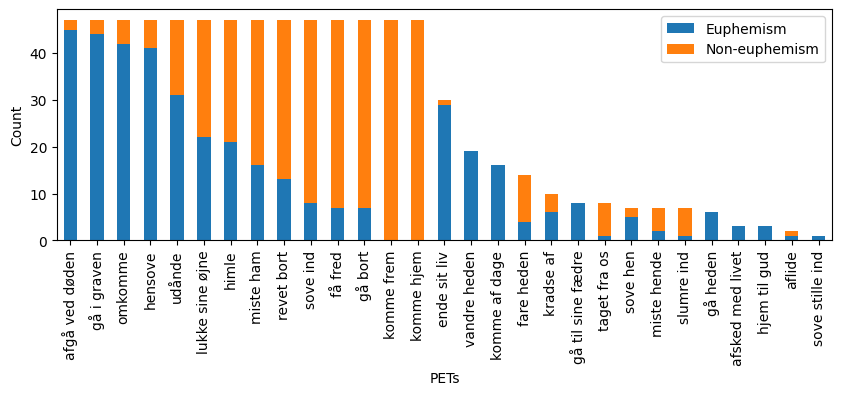

In [ ]:
# prompt: how to plot the phrase key, Yes and No of phrase_stats as a stacked bar and and legend where Yes=Euphemism and No=No-euphemism. Sort them by the sum of both Yes and No from large to small, then number of Yes and then number of No. Save the plot with higher resolution.

import matplotlib.pyplot as plt
# Calculate the total count for each phrase key
phrase_stats['Total'] = phrase_stats['Yes'] + phrase_stats['No']

# Sort the dataframe
phrase_stats = phrase_stats.sort_values(by=['Total', 'Yes', 'No'], ascending=[False, False, False])

# Create the stacked bar plot
ax = phrase_stats[['Yes', 'No']].plot(kind='bar', stacked=True, figsize=(10, 3))

# Set the title and labels
# ax.set_title('Phrase Key - Yes/No Distribution')
ax.set_xlabel('PETs')
ax.set_ylabel('Count')

# Set legend labels
ax.legend(['Euphemism', 'Non-euphemism'])

# Save the plot with higher resolution
plt.savefig('/content/drive/MyDrive/Nors/Euphemisms of Death/Figures/PETs_distribution.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


# Annotated corpus stats

In [ ]:
import pandas as pd

# Define the file path
file_path = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx'

# Read the data from the sheets
df_sheet1 = pd.read_excel(file_path, sheet_name='Training Set (Alex)', usecols=['Sentence_before', 'Sentence', 'Sentence_after'])
df_sheet2 = pd.read_excel(file_path, sheet_name='Training Set (Jens)', usecols=['Sentence_before', 'Sentence', 'Sentence_after'])
df_sheet3 = pd.read_excel(file_path, sheet_name='Training Set (Bolette)', usecols=['Sentence_before', 'Sentence', 'Sentence_after'])
df_sheet4 = pd.read_excel(file_path, sheet_name='Testing Set(All)', usecols=['Sentence_before', 'Sentence', 'Sentence_after'])
# Combine the dataframes
comb_df = pd.concat([df_sheet1, df_sheet2, df_sheet3, df_sheet4])
comb_df['text'] = comb_df['Sentence_before'] + ' ' + comb_df['Sentence'] + ' ' + comb_df['Sentence_after']
comb_df.head()



,Sentence_before,Sentence,Sentence_after,text
0,Hun bedrager migi — gispede han mellem de samm...,er opvokset i sådanne omgivelser ? For en smer...,"simpelthen sige hende , at jeg ved og forstår ...",Hun bedrager migi — gispede han mellem de samm...
1,Og endda hun havde gået og glæd sig til at for...,"git hende mod til at komme hjem , for ellers h...","hun da aldrig vovet at vise sig for ham mere ,...",Og endda hun havde gået og glæd sig til at for...
2,klosterbo . Hvad vil du da ? Vil du sidde her ...,"Når din moder er vandret heden , og denne smule","jord , som endda kun til hælvten er din moders...",klosterbo . Hvad vil du da ? Vil du sidde her ...
3,"„ Kære , gamle ven ! „ Med dyb bekjymring må j...","„ min eneste søn er afgået ved døden , efter e...",„ smertefuldt sygeleje . Jeg var hos ham i han...,"„ Kære , gamle ven ! „ Med dyb bekjymring må j..."
4,„ hendes sidste levedage ; jeg formoder hun vi...,"„ vandrer heden . Bed ham komme herhen , så",„ hurtigt som muligt . “ Det var efter modtage...,„ hendes sidste levedage ; jeg formoder hun vi...


In [ ]:
# prompt: how to calculate the total words in comb_df['text'] and average number of words per sample

# Calculate the total number of words
total_words = sum([len(text.split()) for text in comb_df['text']])

# Calculate the average number of words per sample
average_words_per_sample = total_words / len(comb_df)

print("Total words:", total_words)
print("Average words per sample:", average_words_per_sample)


Total words: 52538
Average words per sample: 65.75469336670838


In [ ]:
for d in df_valid['label'].tolist():
  if d == 1:
    print('Yes')
  else:
    print('No')

Yes
Yes
Yes
Yes
Yes
Yes
No
No
Yes
Yes
No
No
Yes
Yes
Yes
Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
No
No
No
No
No
Yes
Yes
Yes
No
No
Yes
Yes
No
No
No
Yes
Yes
Yes
Yes
Yes
No
No
Yes
No
No
No
No
No
No
Yes
No
Yes
Yes
Yes
Yes
No
No
Yes
Yes
Yes
No
No
No
No
No
No
No
Yes
No
Yes
No
Yes
Yes
No
No
Yes
No
No
No
Yes
No
No
No
Yes
No
Yes
No
No
Yes
Yes
No
Yes
No
No
Yes
No
Yes
Yes
No
Yes
No
No
No
Yes
Yes
Yes
No
No
No
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
No


In [ ]:
for t in df_valid['new_text'].tolist():
  print(t)

noget til denne ulykke . En mørk , uhyggelig stemning greb ham ; han ville <PET>ende sit liv</PET> , som nu synes ham dobbelt ulykkeligt , da han ikke kunne befri sig for den tanke , at han var årsag til den ville piges død .
væggenes malning og det noget massive , men smukke bohave tydede på , at det oprindelig havde tilhørt en længst <PET>hensovet</PET> slægt . Der var noget så holdfast ved disse ting , — det gamle ærværdige taffelur på det store udskårne skab med dets „ anno 1620 “ , den højryggede
kastede , hvor underligt det end lyder , en mørk skygge ind i Arnolds liv . Hun ville se ham lykkelig gift , før hun <PET>lukkede sine øjne</PET> ; — men han elskede en anden kvinde end den , hun havde udset til hans brud . Dette gjorde , at han ikke kunne betro moderen sit
„ Ja , det er også sket for min ven Eugene Sue . Han kunne ikke husfe , hvem man havde ladet <PET>himle</PET> i de første dele og man så derfor oftere flere salig hensovede sjæle stå op igen i de sidste dele og
„ Alle 

In [ ]:
for t in df_test['new_text'].tolist():
  print(t)

længsel efter at høre guds ord , skønt hans fader , som aldrig gik i kirke , slet ikke kunne forstå , at en ung student , som <PET>kom hjem</PET> i en kort påskeferie , straks skulle rende i kirke , som han udtrykte sig — så skulle han i det
det . Hun ville følge sit kald og være trofast mod det : men til faderen kunne hun intet sige ; nej hun måtte vente , til hun <PET>kom hjem</PET> til moderen , å hvor hun længtede efter hende , hun ville forstå hende . Hun smilede , hun
« hvorfor har de ikke sagt mig det straks ? » « hvorfor ? « jeg ville vente til min mand <PET>kom hjem</PET> med at meddele ham det . Jeg vidste , at han var bange for , at teglmesteren skulle løbe fra det hele , medens han var borte . Jeg husker ,
ham i fingrene , og han syntes formeligt , at det krøllede papir lugtede godt . — — da Abraham <PET>kom hjem</PET> , fandt han altså sin far forynget og ivrig i en stor rørelse af . forskellige foretagender , skønt Fortuna
hytte , et slot , et himmerige , hvor hun skulle 

**Euphemism Figures**

Automatic annotated corpus

In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx'

# Read the sheets into separate DataFrames
df_all = pd.read_excel(excel_file, sheet_name='All Segments')
df_all.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key,Is Euphemism?(Automatic)
0,til at passe køer . Du skulle hellere være sto...,kommer hjem som baronen derovre og er drattet,"både hist og her . » « stolt af ! — ja , jeg v...",1893_Schjoerring_SkiftendeTider.txt,1893,kommer hjem,kom* hjem,No
1,"for så vidt passer det jo udmærket . Hør , Kje...",let at komme frem med . »,Denne gang stoppede hun op og blev helt rød . ...,1893_Schjoerring_SkiftendeTider.txt,1893,komme frem,kom* frem,No
2,"milelange , takkede ryg . En gang imellem feje...",tågemasserne så fjældtoppene kom frem som,sorte uformelige kegler mod den blakkede himme...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,kom* frem,No
3,en gang så meget ! » Det var ikke med heftighe...,"kom frem , men med et intensivt hads kolde ro .",Forgæves søgte Fru Krause endnu en gang et for...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,kom* frem,No
4,"stakkel , som ikke mere tålte det ublide klima...","komme hjem til Danmark , for i det mindste at",få en grav . Selv tanken om at skilles fra all...,1893_Schjoerring_SkiftendeTider.txt,1893,komme hjem,kom* hjem,No


In [ ]:
search_forms = {
    "komme hjem": "kom* hjem",
    "komme frem": "kom* frem",
    "gå bort": "g* bort",
    "sove ind": "sov* ind",
    "omkomme": "omkom*",
    "få fred": "f* fred",
    "lukke sine øjne": "lukke* sine øjne",
    "udånde": "udånde*",
    "miste hende": "miste* hende",
    "miste ham": "miste* ham",
    "slumre ind": "slumre* ind",
    "himle": "himl*",
    "afgå ved døden": "afg* ved døden",
    "gå i graven": "g* i graven",
    "revet bort": "revet bort",
    "hensove": "hensov*",
    "sove hen": "sov* hen",
    "ende sit liv": "end* sit liv",
    "vandre heden": "vandr* heden",
    "komme af dage": "kom* af dage",
    "fare heden": "f* heden",
    "kradse af": "krads* af",
    "taget fra os": "taget fra os",
    "gå til sine fædre": "g* til sine fædre",
    "gå heden": "g* heden",
    "hjem til gud": "hjem til gud",
    "afsked med livet": "afsked med livet",
    "aflide": "afl*",
    "sove stille ind": "sov* stille ind"
}
# Reversing the dictionary
reversed_search_forms = {value: key for key, value in search_forms.items()}

print(reversed_search_forms)

{'kom* hjem': 'komme hjem', 'kom* frem': 'komme frem', 'g* bort': 'gå bort', 'sov* ind': 'sove ind', 'omkom*': 'omkomme', 'f* fred': 'få fred', 'lukke* sine øjne': 'lukke sine øjne', 'udånde*': 'udånde', 'miste* hende': 'miste hende', 'miste* ham': 'miste ham', 'slumre* ind': 'slumre ind', 'himl*': 'himle', 'afg* ved døden': 'afgå ved døden', 'g* i graven': 'gå i graven', 'revet bort': 'revet bort', 'hensov*': 'hensove', 'sov* hen': 'sove hen', 'end* sit liv': 'ende sit liv', 'vandr* heden': 'vandre heden', 'kom* af dage': 'komme af dage', 'f* heden': 'fare heden', 'krads* af': 'kradse af', 'taget fra os': 'taget fra os', 'g* til sine fædre': 'gå til sine fædre', 'g* heden': 'gå heden', 'hjem til gud': 'hjem til gud', 'afsked med livet': 'afsked med livet', 'afl*': 'aflide', 'sov* stille ind': 'sove stille ind'}


In [ ]:
# prompt: how to replace each items in df_all['Phrase Key'] which considered to be exist in the keys of reversed_search_forms dict wthe values from the same dictionary

def replace_phrase_with_value(phrase):
  """Replaces a phrase with its corresponding value from the reversed_search_forms dictionary."""
  for key in reversed_search_forms:
    if key in phrase:
      return reversed_search_forms[key]
  return phrase

# Apply the function to the 'Phrase Key' column
df_all['Phrase Key'] = df_all['Phrase Key'].apply(replace_phrase_with_value)


In [ ]:
df_all.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key,Is Euphemism?(Automatic)
0,til at passe køer . Du skulle hellere være sto...,kommer hjem som baronen derovre og er drattet,"både hist og her . » « stolt af ! — ja , jeg v...",1893_Schjoerring_SkiftendeTider.txt,1893,kommer hjem,komme hjem,No
1,"for så vidt passer det jo udmærket . Hør , Kje...",let at komme frem med . »,Denne gang stoppede hun op og blev helt rød . ...,1893_Schjoerring_SkiftendeTider.txt,1893,komme frem,komme frem,No
2,"milelange , takkede ryg . En gang imellem feje...",tågemasserne så fjældtoppene kom frem som,sorte uformelige kegler mod den blakkede himme...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,komme frem,No
3,en gang så meget ! » Det var ikke med heftighe...,"kom frem , men med et intensivt hads kolde ro .",Forgæves søgte Fru Krause endnu en gang et for...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,komme frem,No
4,"stakkel , som ikke mere tålte det ublide klima...","komme hjem til Danmark , for i det mindste at",få en grav . Selv tanken om at skilles fra all...,1893_Schjoerring_SkiftendeTider.txt,1893,komme hjem,komme hjem,No


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only rows where 'Is Euphemism?(Automatic)' is 'Yes'
df_filtered = df_all[df_all['Is Euphemism?(Automatic)'] == 'Yes']
all_values = []
PETs = list(reversed_search_forms.values())
PETs.sort()
Years = df_filtered['Year'].unique()
Years.sort()
print(Years)

len(df_filtered)

for year in Years:
  print(year)
  df_year = df_filtered[df_filtered['Year'] == year]
  phrase_counts = df_year['Phrase Key'].value_counts()
  year_list = []
  for pet in PETs:
    if pet not in phrase_counts:
      year_list.append(0)
    else:
      year_list.append(round(phrase_counts[pet]/len(df_year),2))
  print(year_list)
  all_values.append(year_list)

[1870 1871 1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883
 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897
 1898 1899]
1870
[0.1, 0, 0, 0.03, 0.03, 0, 0.19, 0, 0.03, 0, 0.1, 0.03, 0, 0.03, 0, 0.03, 0.03, 0, 0.06, 0, 0.16, 0, 0, 0.03, 0, 0, 0, 0.1, 0.03]
1871
[0, 0, 0, 0, 0, 0.02, 0.28, 0, 0.04, 0, 0.04, 0.02, 0, 0.02, 0, 0.02, 0, 0.04, 0.04, 0.06, 0.23, 0, 0, 0, 0.04, 0, 0, 0.13, 0]
1872
[0.04, 0, 0, 0, 0, 0, 0.05, 0, 0, 0, 0.02, 0.02, 0, 0, 0, 0.02, 0, 0, 0, 0.02, 0.77, 0, 0.02, 0, 0, 0, 0, 0.04, 0.02]
1873
[0.02, 0, 0, 0.02, 0, 0, 0.26, 0, 0.04, 0, 0.02, 0.07, 0, 0, 0, 0.02, 0, 0.07, 0.04, 0.09, 0.22, 0, 0, 0, 0.04, 0, 0, 0.09, 0]
1874
[0.05, 0, 0, 0.07, 0, 0.02, 0.09, 0, 0.05, 0, 0.05, 0.02, 0, 0.02, 0.02, 0, 0, 0, 0.05, 0.05, 0.26, 0.02, 0.02, 0, 0.09, 0, 0, 0.12, 0]
1875
[0.03, 0, 0, 0.02, 0.01, 0.04, 0.11, 0, 0.15, 0.02, 0.03, 0.01, 0, 0.01, 0, 0.01, 0, 0, 0.03, 0.09, 0.29, 0, 0.01, 0, 0.03, 0, 0, 0.09, 0]
1876
[0.03, 0, 0.01, 0.03, 0, 0, 0.17, 

In [ ]:
PETs

['afgå ved døden',
 'aflide',
 'afsked med livet',
 'ende sit liv',
 'fare heden',
 'få fred',
 'gå bort',
 'gå heden',
 'gå i graven',
 'gå til sine fædre',
 'hensove',
 'himle',
 'hjem til gud',
 'komme af dage',
 'komme frem',
 'komme hjem',
 'kradse af',
 'lukke sine øjne',
 'miste ham',
 'miste hende',
 'omkomme',
 'revet bort',
 'slumre ind',
 'sove hen',
 'sove ind',
 'sove stille ind',
 'taget fra os',
 'udånde',
 'vandre heden']

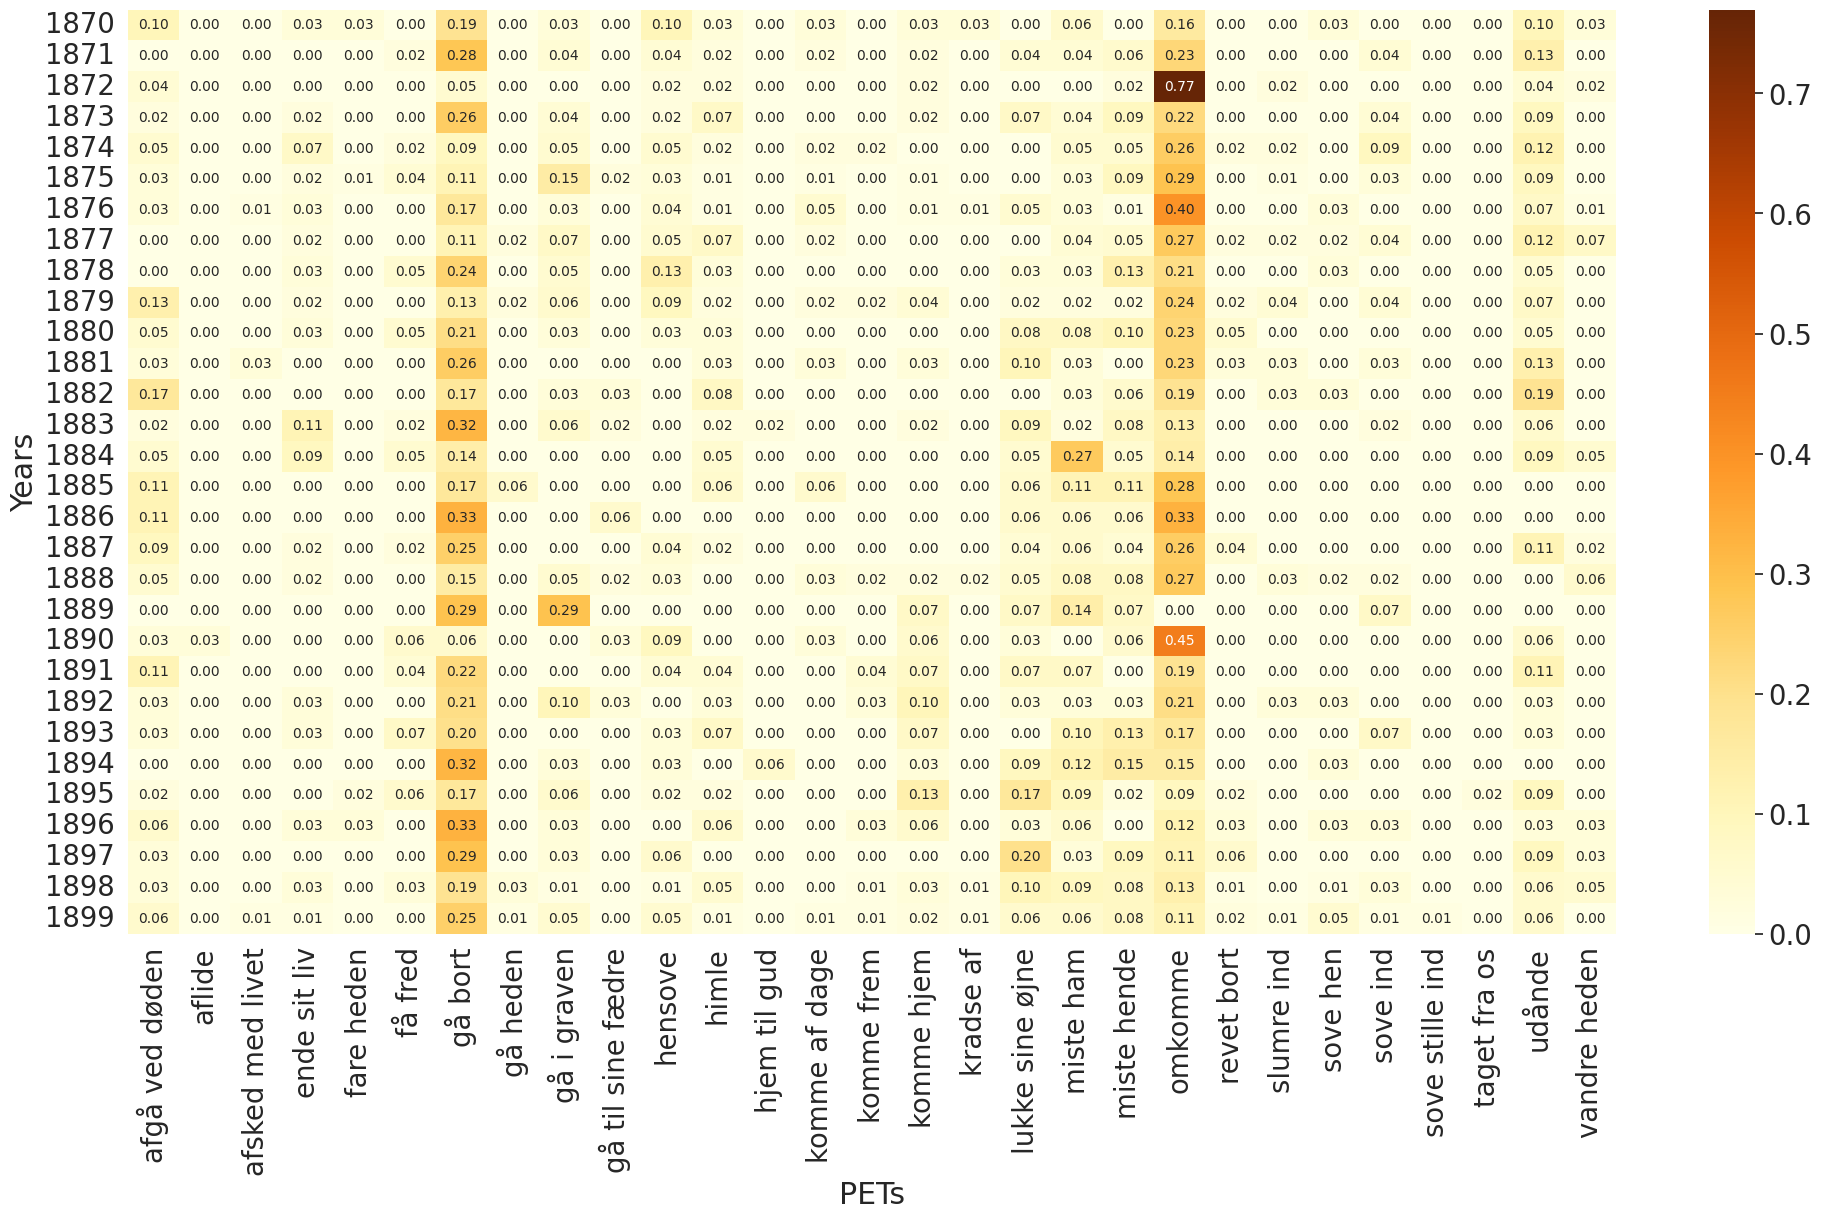

In [ ]:
# prompt: how to plot the all_values in a heatmap where the x-axis is the Years and y-axis is the PETs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_values' is a list of lists, where each inner list represents a year's data
# and the elements within the inner list represent the frequency of each PET for that year.

# Create a DataFrame from 'all_values'
df_heatmap = pd.DataFrame(all_values, columns=PETs, index=Years)

# Create the heatmap
plt.figure(figsize=(24, 12))  # Adjust the figure size as needed
sns.heatmap(df_heatmap, annot=True, cmap='YlOrBr', fmt=".2f", annot_kws={"size": 10})  # Use annot=True to display values #viridis
# sns.set(font_scale=1.4)

# Set labels and title
plt.xlabel('PETs')
plt.ylabel('Years')
# plt.title('Euphemism Frequency Heatmap')
# Save the plot with higher resolution
plt.savefig('/content/drive/MyDrive/Nors/Euphemisms of Death/Figures/PETs_distribution_overtime.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [ ]:
# prompt: transpose the all_values list

transposed_values = list(map(list, zip(*all_values)))
print(transposed_values)

[[0.1, 0, 0.04, 0.02, 0.05, 0.03, 0.03, 0, 0, 0.13, 0.05, 0.03, 0.17, 0.02, 0.05, 0.11, 0.11, 0.09, 0.05, 0, 0.03, 0.11, 0.03, 0.03, 0, 0.02, 0.06, 0.03, 0.03, 0.06], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0.01, 0, 0, 0, 0, 0.03, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.01], [0.03, 0, 0, 0.02, 0.07, 0.02, 0.03, 0.02, 0.03, 0.02, 0.03, 0, 0, 0.11, 0.09, 0, 0, 0.02, 0.02, 0, 0, 0, 0.03, 0.03, 0, 0, 0.03, 0, 0.03, 0.01], [0.03, 0, 0, 0, 0, 0.01, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.02, 0.03, 0, 0, 0], [0, 0.02, 0, 0, 0.02, 0.04, 0, 0, 0.05, 0, 0.05, 0, 0, 0.02, 0.05, 0, 0, 0.02, 0, 0, 0.06, 0.04, 0, 0.07, 0, 0.06, 0, 0, 0.03, 0], [0.19, 0.28, 0.05, 0.26, 0.09, 0.11, 0.17, 0.11, 0.24, 0.13, 0.21, 0.26, 0.17, 0.32, 0.14, 0.17, 0.33, 0.25, 0.15, 0.29, 0.06, 0.22, 0.21, 0.2, 0.32, 0.17, 0.33, 0.29, 0.19, 0.25], [0, 0, 0, 0, 0, 0, 0, 0.02, 0, 0.02, 0, 0, 0, 0, 0, 0.06, 0, 0, 0, 0, 0, 0,

In [ ]:
all_values

[[0.1,
  0,
  0,
  0.03,
  0.03,
  0,
  0.19,
  0,
  0.03,
  0,
  0.1,
  0.03,
  0,
  0.03,
  0,
  0.03,
  0.03,
  0,
  0.06,
  0,
  0.16,
  0,
  0,
  0.03,
  0,
  0,
  0,
  0.1,
  0.03],
 [0,
  0,
  0,
  0,
  0,
  0.02,
  0.28,
  0,
  0.04,
  0,
  0.04,
  0.02,
  0,
  0.02,
  0,
  0.02,
  0,
  0.04,
  0.04,
  0.06,
  0.23,
  0,
  0,
  0,
  0.04,
  0,
  0,
  0.13,
  0],
 [0.04,
  0,
  0,
  0,
  0,
  0,
  0.05,
  0,
  0,
  0,
  0.02,
  0.02,
  0,
  0,
  0,
  0.02,
  0,
  0,
  0,
  0.02,
  0.77,
  0,
  0.02,
  0,
  0,
  0,
  0,
  0.04,
  0.02],
 [0.02,
  0,
  0,
  0.02,
  0,
  0,
  0.26,
  0,
  0.04,
  0,
  0.02,
  0.07,
  0,
  0,
  0,
  0.02,
  0,
  0.07,
  0.04,
  0.09,
  0.22,
  0,
  0,
  0,
  0.04,
  0,
  0,
  0.09,
  0],
 [0.05,
  0,
  0,
  0.07,
  0,
  0.02,
  0.09,
  0,
  0.05,
  0,
  0.05,
  0.02,
  0,
  0.02,
  0.02,
  0,
  0,
  0,
  0.05,
  0.05,
  0.26,
  0.02,
  0.02,
  0,
  0.09,
  0,
  0,
  0.12,
  0],
 [0.03,
  0,
  0,
  0.02,
  0.01,
  0.04,
  0.11,
  0,
  0.15,
  0.02,
 

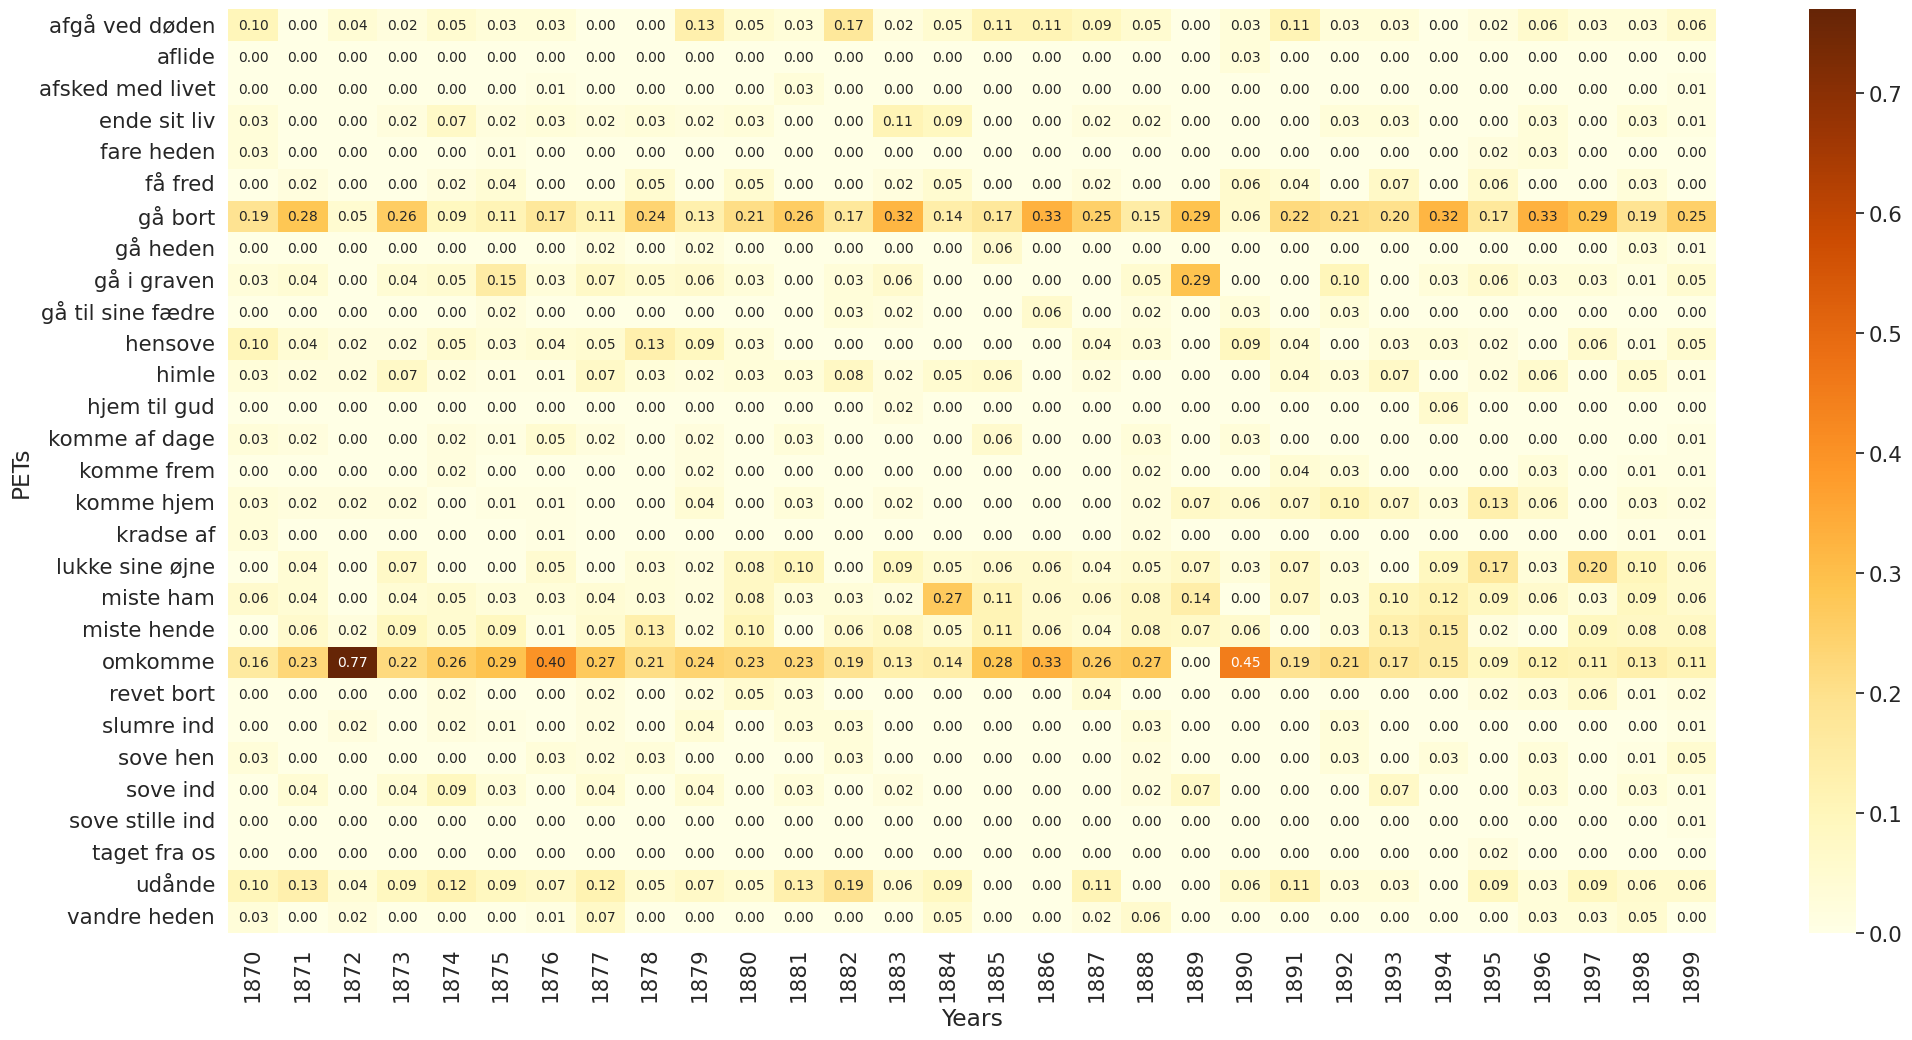

In [ ]:
# prompt: how to plot the all_values in a heatmap where the x-axis is the Years and y-axis is the PETs

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'all_values' is a list of lists, where each inner list represents a year's data
# and the elements within the inner list represent the frequency of each PET for that year.

# Create a DataFrame from 'all_values'
df_heatmap = pd.DataFrame(transposed_values, columns=Years, index=PETs)

# Create the heatmap
plt.figure(figsize=(24, 12))  # Adjust the figure size as needed

sns.heatmap(df_heatmap, annot=True, cmap='YlOrBr', fmt=".2f", annot_kws={"size": 10})  # Use annot=True to display values #viridis


# Set labels and title
plt.xlabel('Years')
plt.ylabel('PETs')
# plt.title('Euphemism Frequency Heatmap')
# Save the plot with higher resolution
plt.savefig('/content/drive/MyDrive/Nors/Euphemisms of Death/Figures/PETs_distribution_overtime_1.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


**Euphemism VS. Gender**

In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/MeMo-corpus-metadata-v1.1-2023-06-20.xlsx'

# Read the sheets into separate DataFrames
memo_df = pd.read_excel(excel_file, sheet_name='Data')
memo_df.head()

,file_id,file_received,filename,firstname,surname,pseudonym,gender,nationality,title,subtitle,...,period_notes,novel_start,novel_end,novelstart_rescan,novelend_rescan,start_end_page_notes,serialno,quarantine,discard,historical.1
0,130024227090,y,1870_AndersenHC_LykkePeer.pdf,H.C.,Andersen,NaN,m,dk,Lykke-Peer,NaN,...,NaN,10,190,NaN,NaN,NaN,12.0,NaN,NaN,n
1,NaN,NaN,NaN,Henriette,Brandis,anonym,f,dk,Triumf,En Fortælling,...,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,n
2,130021032396,y,1870_Brosboell_TranensVarsel.pdf,Carl,Brosbøll,Carit Etlar,m,dk,Tranens Varsel,En Roman,...,NaN,13,536,5.0,NaN,NaN,117.0,NaN,NaN,n
3,130023646405,y,1870_Dodt_AegteOgUaegte.pdf,Beatus,Dodt,NaN,m,dk,Ægte og Uægte,Livsbillede,...,barndomsskildring,9,525,3.0,NaN,NaN,171.0,NaN,NaN,n
4,130024100058,y,1870_Friis_MoedetPaaLaesoe.pdf,J.J.F.,Friis,NaN,m,dk,Mødet paa Læsø,En Fortælling,...,NaN,12,175,NaN,NaN,NaN,227.0,NaN,NaN,n


In [ ]:
# Create an empty dictionary to store the filename and historical.1 values
filename_historical_dict = {}

# Iterate through the rows of the DataFrame
for index, row in memo_df.iterrows():
  filename = row['filename']
  historical_value = row['historical.1']
  filename_historical_dict[filename] = historical_value

# Print the dictionary
print(filename_historical_dict)


{'1870_AndersenHC_LykkePeer.pdf': 'n', nan: 'n', '1870_Brosboell_TranensVarsel.pdf': 'n', '1870_Dodt_AegteOgUaegte.pdf': 'n', '1870_Friis_MoedetPaaLaesoe.pdf': 'n', '1870_Friis_MagnusHeinesen.pdf': 'n', '1870_Gerson_AfDetDagligeLiv.pdf': 'n', '1893_AndersenFO_Irma.pdf': 'n', '1870_Juel_Hittebarnet.pdf': 'n', '1870_Korfitsen_EnSkibbruden.pdf': 'n', '1870_Lange_AaenOgHavet.pdf': 'n', '1870_LevetzowV_ModersArv.pdf': 'n', '1877_Bjoernson_Magnhild.pdf': 'n', '1870_LundOC_ZittaEllerDomkirkensDatter.pdf': 'n', '1870_Laessoee_TilMaalet.pdf': 'n', '1870_Schwartz_EnhverSinMission.pdf': 'n', '1880_Andersen_DenGodeAlvilda.pdf': 'n', '1887_Beissel_Munkeliv.pdf': 'n', '1894_Bey_JulenissenSpinder.pdf': 'n', '1876_Borring_FaergemandensDatter_1.pdf': 'n', '1877_Borring_FaergemandensDatter_2.pdf': 'n', '1870_Gundersen_EnPolitimandsErindringer.pdf': 'n', '1894_Jespersen_Kursuskammerater.pdf': 'n', '1871_AndersenMS_Viggo.pdf': 'n', '1871_Barner_Armbaandet.pdf': 'n', '1871_Behrend_Hulda.pdf': 'n', '1871_Be

In [ ]:
filename_historical_dict.keys()

dict_keys(['1870_AndersenHC_LykkePeer.pdf', nan, '1870_Brosboell_TranensVarsel.pdf', '1870_Dodt_AegteOgUaegte.pdf', '1870_Friis_MoedetPaaLaesoe.pdf', '1870_Friis_MagnusHeinesen.pdf', '1870_Gerson_AfDetDagligeLiv.pdf', '1893_AndersenFO_Irma.pdf', '1870_Juel_Hittebarnet.pdf', '1870_Korfitsen_EnSkibbruden.pdf', '1870_Lange_AaenOgHavet.pdf', '1870_LevetzowV_ModersArv.pdf', '1877_Bjoernson_Magnhild.pdf', '1870_LundOC_ZittaEllerDomkirkensDatter.pdf', '1870_Laessoee_TilMaalet.pdf', '1870_Schwartz_EnhverSinMission.pdf', '1880_Andersen_DenGodeAlvilda.pdf', '1887_Beissel_Munkeliv.pdf', '1894_Bey_JulenissenSpinder.pdf', '1876_Borring_FaergemandensDatter_1.pdf', '1877_Borring_FaergemandensDatter_2.pdf', '1870_Gundersen_EnPolitimandsErindringer.pdf', '1894_Jespersen_Kursuskammerater.pdf', '1871_AndersenMS_Viggo.pdf', '1871_Barner_Armbaandet.pdf', '1871_Behrend_Hulda.pdf', '1871_Behrend_Madelaine.pdf', '1871_Bergsoee_ISabinerbjergene_1.pdf', '1871_Bergsoee_ISabinerbjergene_2.pdf', '1871_Brandis_LysO

In [ ]:
df_all.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key,Is Euphemism?(Automatic)
0,til at passe køer . Du skulle hellere være sto...,kommer hjem som baronen derovre og er drattet,"både hist og her . » « stolt af ! — ja , jeg v...",1893_Schjoerring_SkiftendeTider.txt,1893,kommer hjem,komme hjem,No
1,"for så vidt passer det jo udmærket . Hør , Kje...",let at komme frem med . »,Denne gang stoppede hun op og blev helt rød . ...,1893_Schjoerring_SkiftendeTider.txt,1893,komme frem,komme frem,No
2,"milelange , takkede ryg . En gang imellem feje...",tågemasserne så fjældtoppene kom frem som,sorte uformelige kegler mod den blakkede himme...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,komme frem,No
3,en gang så meget ! » Det var ikke med heftighe...,"kom frem , men med et intensivt hads kolde ro .",Forgæves søgte Fru Krause endnu en gang et for...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,komme frem,No
4,"stakkel , som ikke mere tålte det ublide klima...","komme hjem til Danmark , for i det mindste at",få en grav . Selv tanken om at skilles fra all...,1893_Schjoerring_SkiftendeTider.txt,1893,komme hjem,komme hjem,No


In [ ]:
file_list = df_all['Filename'].tolist()
is_historical = []
for file1 in file_list:
  is_historical.append(filename_historical_dict[file1.replace('.txt', '.pdf')])
print(is_historical)

['n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'y', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'n', 'y', 'y', 'n', 'n', 'n', 'n', 'n',

In [ ]:
# Create an empty dictionary to store the filename and gender values
filename_gender_dict = {}

# Iterate through the rows of the DataFrame
for index, row in memo_df.iterrows():
  filename = row['filename']
  gender_value = row['gender']
  filename_gender_dict[filename] = gender_value

# Print the dictionary
print(filename_gender_dict)


{'1870_AndersenHC_LykkePeer.pdf': 'm', nan: nan, '1870_Brosboell_TranensVarsel.pdf': 'm', '1870_Dodt_AegteOgUaegte.pdf': 'm', '1870_Friis_MoedetPaaLaesoe.pdf': 'm', '1870_Friis_MagnusHeinesen.pdf': 'm', '1870_Gerson_AfDetDagligeLiv.pdf': 'm', '1893_AndersenFO_Irma.pdf': nan, '1870_Juel_Hittebarnet.pdf': 'f', '1870_Korfitsen_EnSkibbruden.pdf': 'm', '1870_Lange_AaenOgHavet.pdf': 'm', '1870_LevetzowV_ModersArv.pdf': 'f', '1877_Bjoernson_Magnhild.pdf': 'm', '1870_LundOC_ZittaEllerDomkirkensDatter.pdf': 'm', '1870_Laessoee_TilMaalet.pdf': 'm', '1870_Schwartz_EnhverSinMission.pdf': 'f', '1880_Andersen_DenGodeAlvilda.pdf': 'm', '1887_Beissel_Munkeliv.pdf': nan, '1894_Bey_JulenissenSpinder.pdf': nan, '1876_Borring_FaergemandensDatter_1.pdf': 'm', '1877_Borring_FaergemandensDatter_2.pdf': 'm', '1870_Gundersen_EnPolitimandsErindringer.pdf': 'm', '1894_Jespersen_Kursuskammerater.pdf': 'f', '1871_AndersenMS_Viggo.pdf': 'm', '1871_Barner_Armbaandet.pdf': 'f', '1871_Behrend_Hulda.pdf': 'm', '1871_Be

In [ ]:
file_list = df_all['Filename'].tolist()
gender_list = []
for file1 in file_list:
  gender_list.append(filename_gender_dict[file1.replace('.txt', '.pdf')])
print(gender_list)

['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm', 'm',

In [ ]:
df_all['is_historical'] = is_historical
df_all['gender'] = gender_list
df_all.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,Match,Phrase Key,Is Euphemism?(Automatic),is_historical,gender
0,til at passe køer . Du skulle hellere være sto...,kommer hjem som baronen derovre og er drattet,"både hist og her . » « stolt af ! — ja , jeg v...",1893_Schjoerring_SkiftendeTider.txt,1893,kommer hjem,komme hjem,No,n,f
1,"for så vidt passer det jo udmærket . Hør , Kje...",let at komme frem med . »,Denne gang stoppede hun op og blev helt rød . ...,1893_Schjoerring_SkiftendeTider.txt,1893,komme frem,komme frem,No,n,f
2,"milelange , takkede ryg . En gang imellem feje...",tågemasserne så fjældtoppene kom frem som,sorte uformelige kegler mod den blakkede himme...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,komme frem,No,n,f
3,en gang så meget ! » Det var ikke med heftighe...,"kom frem , men med et intensivt hads kolde ro .",Forgæves søgte Fru Krause endnu en gang et for...,1893_Schjoerring_SkiftendeTider.txt,1893,kom frem,komme frem,No,n,f
4,"stakkel , som ikke mere tålte det ublide klima...","komme hjem til Danmark , for i det mindste at",få en grav . Selv tanken om at skilles fra all...,1893_Schjoerring_SkiftendeTider.txt,1893,komme hjem,komme hjem,No,n,f


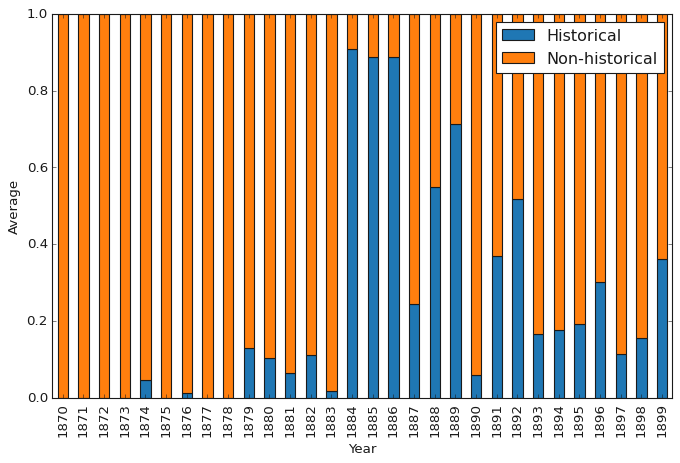

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Is Euphemism?(Automatic)' is 'Yes'
df_filtered = df_all[(df_all['Is Euphemism?(Automatic)'] == 'Yes') & (df_all['is_historical'].isin(['y', 'n']))]

# Group by 'Year' and 'is_historical', then calculate the average
historical_year_avg = df_filtered.groupby(['Year', 'is_historical'])['is_historical'].count().unstack().fillna(0)

# Calculate the total count for each year
historical_year_avg['Total'] = historical_year_avg['y'] + historical_year_avg['n']

# Calculate the average for each historical
historical_year_avg['y_avg'] = historical_year_avg['y'] / historical_year_avg['Total']
historical_year_avg['n_avg'] = historical_year_avg['n'] / historical_year_avg['Total']

# Create the figure and axis with a white background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Create the stacked bar plot with specified colors
historical_year_avg[['y_avg', 'n_avg']].plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Set the title and labels
ax.set_xlabel('Year')
ax.set_ylabel('Average')
# ax.set_title('Euphemism Historical Distribution Over Time')

# Set legend labels
ax.legend(['Historical', 'Non-historical'])

# Save the plot with higher resolution
plt.savefig('/content/drive/MyDrive/Nors/Euphemisms of Death/Figures/Euphemism_historical_Distribution_Over_Time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


In [ ]:
df_all['is_historical'].value_counts()

,count
is_historical,
n,8934
y,2346


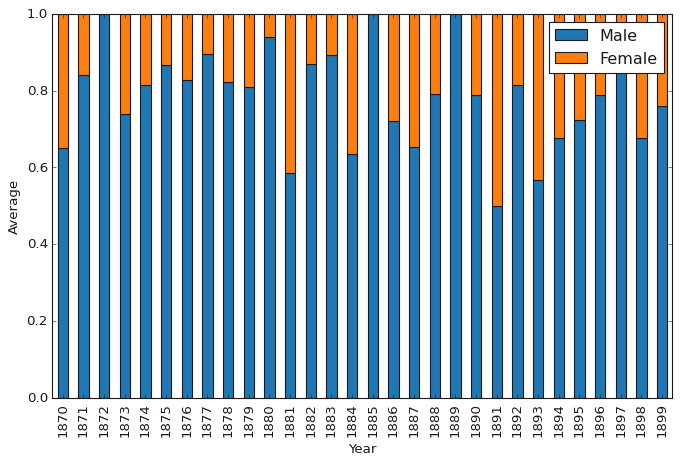

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only rows where 'Is Euphemism?(Automatic)' is 'Yes'
df_filtered = df_all[(df_all['Is Euphemism?(Automatic)'] == 'Yes') & (df_all['gender'].isin(['m', 'f']))]

# Group by 'Year' and 'gender', then calculate the average
gender_year_avg = df_filtered.groupby(['Year', 'gender'])['gender'].count().unstack().fillna(0)

# Calculate the total count for each year
gender_year_avg['Total'] = gender_year_avg['m'] + gender_year_avg['f']

# Calculate the average for each gender
gender_year_avg['m_avg'] = gender_year_avg['m'] / gender_year_avg['Total']
gender_year_avg['f_avg'] = gender_year_avg['f'] / gender_year_avg['Total']

# Create the figure and axis with a white background
fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

# Create the stacked bar plot with specified colors
gender_year_avg[['m_avg', 'f_avg']].plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])

# Set the title and labels
ax.set_xlabel('Year')
ax.set_ylabel('Average')
# ax.set_title('Euphemism Gender Distribution Over Time')

# Set legend labels
ax.legend(['Male', 'Female'])

# Save the plot with higher resolution
plt.savefig('/content/drive/MyDrive/Nors/Euphemisms of Death/Figures/Euphemism_Gender_Distribution_Over_Time.png', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


**Death Segments**

In [ ]:
!pip install -U spacy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 40.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.6
    Uninstalling spacy-3.7.6:
      Successfully uninstalled spacy-3.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.7.1 requires spacy<3.8.0,>=3.7.2, but you have spacy 3.8.0 which is incompatible.


In [ ]:
!python -m spacy download da_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 23.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('da_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
import da_core_news_md
nlp = da_core_news_md.load()

In [ ]:
import spacy


def analyze_words(text):
    # Process the text using the Danish NLP model
    doc = nlp(text)

    # Iterate through each token in the document
    for token in doc:
        # Check if the token starts with 'dør'
        if token.text.lower().startswith('dør'):
            # Get the lemma and part of speech
            lemma = token.lemma_
            pos = token.pos_

            # Determine if it's used as a verb for "die" or a noun for "door"
            if pos == 'VERB':
                print(f"The word '{token.text}' is used as a verb (to die): {lemma}")
            elif pos == 'NOUN':
                print(f"The word '{token.text}' is used as a noun (door): {lemma}")
            else:
                print(f"The word '{token.text}' is used as a {pos}: {lemma}")

# Example usage
text = "Han dør og døren var åben."
analyze_words(text)


The word 'dør' is used as a verb (to die): dø


In [ ]:
import spacy

# Load the Danish language model

def analyze_danish_sentence(text):
    # Process the text using the Danish NLP model
    doc = nlp(text)

    # Iterate through each token in the document
    results = []
    is_death_phrase = False
    for token in doc:
        # Check if the token starts with 'dø'
        if token.text.lower().startswith('dø'):
            # Get the lemma, part of speech, and detailed POS tag
            lemma = token.lemma_
            pos = token.pos_
            tag = token.tag_

            # Prepare the output for this token
            result = {
                "word": token.text,
                "lemma": lemma,
                "pos": pos,
                "tag": tag,
                "description": ""
            }

            # Determine usage based on POS
            if pos == 'VERB' :
                result["description"] = "Used as a verb (to die)"
                is_death_phrase = True
            elif pos == 'ADJ' :
                result["description"] = "Used as a adjective (Dead )"
                is_death_phrase = True
            elif pos == 'NOUN':
                # Determine the specific noun use based on context or further rules
                if "dør" in lemma:  # Danish for "door"
                    result["description"] = "Used as a noun (door)"
                    is_death_phrase = False
                else:
                    result["description"] = "Used as a noun (die)"
                    is_death_phrase = True

            results.append(result)

    return results, is_death_phrase

# Example usage
sentence = "Melittas dør forbi ."
results,is_death = analyze_danish_sentence(sentence)
print(results,is_death )


[{'word': 'dør', 'lemma': 'dø', 'pos': 'VERB', 'tag': 'VERB', 'description': 'Used as a verb (to die)'}] True


In [ ]:
# prompt: read excel file to pandas datafrramr Death_Matching_Segments_Phrases_Extended_2

import pandas as pd
# df = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segment (MeMo corpus).xlsx', sheet_name="Detailed Segments")
df_death = pd.read_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx', sheet_name="Death Phrases")
df_death.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year
0,"Etatsråden var lille , en smule forvokset og k...",der er præket til døde .,Fordums kammerater vidste at fortælle om en le...,1893_Schjoerring_SkiftendeTider.txt,1893
1,"« jo , hun er nu nervøs , hun er nervøs ! — vi...",hver gang en dør går ! » docerede fruen,"hele liden mellem de talrige gæster . Minona ,...",1893_Schjoerring_SkiftendeTider.txt,1893
2,Den klæder dem storartet ; men at tænke sig de...,"været ved at dø af nysgerrighed over dem ,",hvorfor forlod de standen ? » « som om det lod...,1893_Schjoerring_SkiftendeTider.txt,1893
3,"Danmark og megen sorg med en syg kone , der ik...","daglige slid , og små børn , der døde kort eft...",smertefuld fødsel . På kirkegården langt inde ...,1893_Schjoerring_SkiftendeTider.txt,1893
4,"levemåde , det ublide klima og det møjsomme sl...","Da endelig den gamle onkel døde , var Krause","en udslidt , halvgammel mand , og hun en syg s...",1893_Schjoerring_SkiftendeTider.txt,1893


In [ ]:
df_death['text'] = df_death['Sentence_before'] + ' ' + df_death['Sentence'] + ' ' + df_death['Sentence_after']
df_death.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,text
0,"Etatsråden var lille , en smule forvokset og k...",der er præket til døde .,Fordums kammerater vidste at fortælle om en le...,1893_Schjoerring_SkiftendeTider.txt,1893,"Etatsråden var lille , en smule forvokset og k..."
1,"« jo , hun er nu nervøs , hun er nervøs ! — vi...",hver gang en dør går ! » docerede fruen,"hele liden mellem de talrige gæster . Minona ,...",1893_Schjoerring_SkiftendeTider.txt,1893,"« jo , hun er nu nervøs , hun er nervøs ! — vi..."
2,Den klæder dem storartet ; men at tænke sig de...,"været ved at dø af nysgerrighed over dem ,",hvorfor forlod de standen ? » « som om det lod...,1893_Schjoerring_SkiftendeTider.txt,1893,Den klæder dem storartet ; men at tænke sig de...
3,"Danmark og megen sorg med en syg kone , der ik...","daglige slid , og små børn , der døde kort eft...",smertefuld fødsel . På kirkegården langt inde ...,1893_Schjoerring_SkiftendeTider.txt,1893,"Danmark og megen sorg med en syg kone , der ik..."
4,"levemåde , det ublide klima og det møjsomme sl...","Da endelig den gamle onkel døde , var Krause","en udslidt , halvgammel mand , og hun en syg s...",1893_Schjoerring_SkiftendeTider.txt,1893,"levemåde , det ublide klima og det møjsomme sl..."


In [ ]:
from tqdm import tqdm

# Assuming 'df_death' is your DataFrame and it contains a column 'text' with sentences
is_death_list = []
language_list = []

# Iterate through each sentence in the DataFrame with a progress bar
for sentence in tqdm(df_death['text'].tolist(), desc="Analyzing sentences"):
    result, is_death = analyze_danish_sentence(sentence)
    language_list.append(result)
    is_death_list.append(is_death)

# Append results to the DataFrame
df_death['is_death'] = is_death_list
df_death['explanation'] = language_list

# Display the head of the DataFrame to check the results
df_death.head()


Analyzing sentences: 100%|██████████| 23741/23741 [04:56<00:00, 80.16it/s]


,Sentence_before,Sentence,Sentence_after,Filename,Year,text,is_death,explanation
0,"Etatsråden var lille , en smule forvokset og k...",der er præket til døde .,Fordums kammerater vidste at fortælle om en le...,1893_Schjoerring_SkiftendeTider.txt,1893,"Etatsråden var lille , en smule forvokset og k...",True,"[{'word': 'døde', 'lemma': 'død', 'pos': 'NOUN..."
1,"« jo , hun er nu nervøs , hun er nervøs ! — vi...",hver gang en dør går ! » docerede fruen,"hele liden mellem de talrige gæster . Minona ,...",1893_Schjoerring_SkiftendeTider.txt,1893,"« jo , hun er nu nervøs , hun er nervøs ! — vi...",False,"[{'word': 'dør', 'lemma': 'dør', 'pos': 'NOUN'..."
2,Den klæder dem storartet ; men at tænke sig de...,"været ved at dø af nysgerrighed over dem ,",hvorfor forlod de standen ? » « som om det lod...,1893_Schjoerring_SkiftendeTider.txt,1893,Den klæder dem storartet ; men at tænke sig de...,True,"[{'word': 'dø', 'lemma': 'dø', 'pos': 'VERB', ..."
3,"Danmark og megen sorg med en syg kone , der ik...","daglige slid , og små børn , der døde kort eft...",smertefuld fødsel . På kirkegården langt inde ...,1893_Schjoerring_SkiftendeTider.txt,1893,"Danmark og megen sorg med en syg kone , der ik...",True,"[{'word': 'døde', 'lemma': 'dø', 'pos': 'VERB'..."
4,"levemåde , det ublide klima og det møjsomme sl...","Da endelig den gamle onkel døde , var Krause","en udslidt , halvgammel mand , og hun en syg s...",1893_Schjoerring_SkiftendeTider.txt,1893,"levemåde , det ublide klima og det møjsomme sl...",True,"[{'word': 'døde', 'lemma': 'død', 'pos': 'ADJ'..."


In [ ]:
from transformers import pipeline
clf = pipeline("text-classification", 'yemen2016/danskbert_ED1')
#The best performing model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/783 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.09M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/965 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
from tqdm import tqdm
labels = []
for sentence in tqdm(df_death['text'].tolist()):
    answer = clf(sentence)
    predicted_sentiment = answer[0]['label'][6:]
    if predicted_sentiment == '1':  # Make sure this check aligns with the actual values
        labels.append('Yes')
    else:
        labels.append('No')
    # print(predicted_sentiment)


100%|██████████| 23741/23741 [26:35<00:00, 14.88it/s]


In [ ]:
df_death['label'] = labels

In [ ]:
df_death.head()

,Sentence_before,Sentence,Sentence_after,Filename,Year,text,is_death,explanation,label
0,"Etatsråden var lille , en smule forvokset og k...",der er præket til døde .,Fordums kammerater vidste at fortælle om en le...,1893_Schjoerring_SkiftendeTider.txt,1893,"Etatsråden var lille , en smule forvokset og k...",True,"[{'word': 'døde', 'lemma': 'død', 'pos': 'NOUN...",Yes
1,"« jo , hun er nu nervøs , hun er nervøs ! — vi...",hver gang en dør går ! » docerede fruen,"hele liden mellem de talrige gæster . Minona ,...",1893_Schjoerring_SkiftendeTider.txt,1893,"« jo , hun er nu nervøs , hun er nervøs ! — vi...",False,"[{'word': 'dør', 'lemma': 'dør', 'pos': 'NOUN'...",No
2,Den klæder dem storartet ; men at tænke sig de...,"været ved at dø af nysgerrighed over dem ,",hvorfor forlod de standen ? » « som om det lod...,1893_Schjoerring_SkiftendeTider.txt,1893,Den klæder dem storartet ; men at tænke sig de...,True,"[{'word': 'dø', 'lemma': 'dø', 'pos': 'VERB', ...",No
3,"Danmark og megen sorg med en syg kone , der ik...","daglige slid , og små børn , der døde kort eft...",smertefuld fødsel . På kirkegården langt inde ...,1893_Schjoerring_SkiftendeTider.txt,1893,"Danmark og megen sorg med en syg kone , der ik...",True,"[{'word': 'døde', 'lemma': 'dø', 'pos': 'VERB'...",Yes
4,"levemåde , det ublide klima og det møjsomme sl...","Da endelig den gamle onkel døde , var Krause","en udslidt , halvgammel mand , og hun en syg s...",1893_Schjoerring_SkiftendeTider.txt,1893,"levemåde , det ublide klima og det møjsomme sl...",True,"[{'word': 'døde', 'lemma': 'død', 'pos': 'ADJ'...",Yes


In [ ]:
df_death.to_excel('/content/drive/MyDrive/Nors/Euphemisms of Death/death_sample_data.xlsx', index=False)


In [ ]:
import openpyxl

# Load the existing workbook
workbook = openpyxl.load_workbook('/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx')

# Select the sheet you want to add columns to
sheet = workbook['Death']  # Replace 'Sheet1' with your sheet name



# Add the columns to the sheet
for i, value in enumerate(is_death_list, start=2):  # Start from row 2 to skip header
    sheet.cell(row=i, column=sheet.max_column + 1, value=value)

for i, value in enumerate(language_list, start=2):
    sheet.cell(row=i, column=sheet.max_column, value=value)

for i, value in enumerate(labels, start=2):
    sheet.cell(row=i, column=sheet.max_column, value=value)

# Save the workbook
workbook.save('your_excel_file.xlsx')


**F1-score on PETs of Testing set**

In [ ]:
import pandas as pd

# Specify the path to your Excel file
excel_file = '/content/drive/MyDrive/Nors/Euphemisms of Death/Euphemism Segments (MeMo corpus)_extended.xlsx'

# Read the sheets into separate DataFrames
memo_df = pd.read_excel(excel_file, sheet_name='Testing Set(All)')
memo_df.head()

,Sentence_before,Sentence,Sentence_after,Match,Phrase Key,Is Death Euphemism? (Alex),Is Death Euphemism? (Bolette),Is Death Euphemism? (Jens),Majority Class,MeMo-BERT-03 Class,NB-BERT,Dansk BERT,DFM
0,"længsel efter at høre guds ord , skønt hans fa...","forstå , at en ung student , som kom hjem i en","kort påskeferie , straks skulle rende i kirke ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No
1,det . Hun ville følge sit kald og være trofast...,"sige ; nej hun måtte vente , til hun kom hjem","til moderen , å hvor hun længtede efter hende ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No
2,« hvorfor har de ikke sagt mig det straks ? » ...,"kom hjem med at meddele ham det . Jeg vidste ,","at han var bange for , at teglmesteren skulle ...",kom hjem,kom* hjem,No,No,No,No,No,No,No,No
3,"ham i fingrene , og han syntes formeligt , at ...","— da Abraham kom hjem , fandt han altså",sin far forynget og ivrig i en stor rørelse af...,kom hjem,kom* hjem,No,No,No,No,No,No,No,No
4,"hytte , et slot , et himmerige , hvor hun skul...","Da han varm og åndepusten kom hjem , var",alle gået . Moderen trådte ham i møde . „ Nu e...,kom hjem,kom* hjem,No,No,No,No,No,No,No,No


In [ ]:
# prompt: how to calculate the f1-score between the Majority Class and Dansk BERT columns per unique values in Phrase Key column?

from sklearn.metrics import f1_score

# Assuming your DataFrame is named 'memo_df' and contains 'Majority Class', 'Dansk BERT', and 'Phrase Key' columns

# Create an empty dictionary to store F1-scores for each unique Phrase Key
f1_scores_per_phrase = {}

# Get unique Phrase Key values
unique_phrase_keys = memo_df['Phrase Key'].unique()

# prompt: how to calculate the f1-score weighted between two string lists

from sklearn.metrics import f1_score

def calculate_weighted_f1_score(y_true, y_pred):
  """
  Calculates the weighted F1-score between two string lists.

  Args:
    y_true: A list of true labels (strings).
    y_pred: A list of predicted labels (strings).

  Returns:
    The weighted F1-score.
  """

  # Convert string labels to numerical labels
  unique_labels = sorted(list(set(y_true + y_pred)))
  label_mapping = {label: i for i, label in enumerate(unique_labels)}
  y_true_numeric = [label_mapping[label] for label in y_true]
  y_pred_numeric = [label_mapping[label] for label in y_pred]

  # Calculate the weighted F1-score
  f1 = f1_score(y_true_numeric, y_pred_numeric, average='weighted')

  return f1

# Iterate through unique Phrase Keys
keyss = ['slumre* ind', 'sov* hen', 'g* heden']
valuess = []
for phrase_key in unique_phrase_keys:
    # Filter the DataFrame for the current Phrase Key
    df_phrase = memo_df[memo_df['Phrase Key'] == phrase_key]

    # Example usage:
    y_true = df_phrase['Majority Class'].tolist()
    y_pred = df_phrase['Dansk BERT'].tolist()

    weighted_f1 = calculate_weighted_f1_score(y_true, y_pred)
    # print(f"Weighted F1-score: {weighted_f1}")
    print(f"PET: {phrase_key}, F1-score: {weighted_f1}")
    # print(len(df_phrase))
    valuess.append(weighted_f1)
print(sum(valuess)/len(valuess))

PET: kom* hjem, F1-score: 1.0
PET: kom* frem, F1-score: 0.923076923076923
PET: g* bort, F1-score: 0.923076923076923
PET: miste* ham, F1-score: 0.923076923076923
PET: lukke* sine øjne, F1-score: 1.0
PET: omkom*, F1-score: 1.0
PET: f* fred, F1-score: 0.923076923076923
PET: sov* ind, F1-score: 0.5904761904761904
PET: hensov*, F1-score: 1.0
PET: slumre* ind, F1-score: 0.7912087912087912
PET: himl*, F1-score: 0.7023809523809523
PET: g* i graven, F1-score: 0.7912087912087912
PET: udånde*, F1-score: 1.0
PET: revet bort, F1-score: 1.0
PET: afg* ved døden, F1-score: 0.7912087912087912
PET: miste* hende, F1-score: 1.0
PET: sov* hen, F1-score: 0.5714285714285715
PET: g* heden, F1-score: 1.0
0.8850122100122101


In [ ]:
# prompt: how to calculate the f1-score weighted between two string lists

from sklearn.metrics import f1_score

def calculate_weighted_f1_score(y_true, y_pred):
  """
  Calculates the weighted F1-score between two string lists.

  Args:
    y_true: A list of true labels (strings).
    y_pred: A list of predicted labels (strings).

  Returns:
    The weighted F1-score.
  """

  # Convert string labels to numerical labels
  unique_labels = sorted(list(set(y_true + y_pred)))
  label_mapping = {label: i for i, label in enumerate(unique_labels)}
  y_true_numeric = [label_mapping[label] for label in y_true]
  y_pred_numeric = [label_mapping[label] for label in y_pred]

  # Calculate the weighted F1-score
  f1 = f1_score(y_true_numeric, y_pred_numeric, average='weighted')

  return f1

# Example usage:
y_true = ['Yes', 'No', 'Yes', 'Yes', 'No']
y_pred = ['Yes', 'Yes', 'Yes', 'No', 'No']

weighted_f1 = calculate_weighted_f1_score(y_true, y_pred)
print(f"Weighted F1-score: {weighted_f1}")
